# **1. Đọc dữ liệu và review thông tin sơ bộ**

---

In [ ]:
import pandas as pd
import warnings

# Tắt các cảnh báo không cần thiết
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Cấu hình Pandas để hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

# Đọc dữ liệu
df = pd.read_csv('data_EDA.csv')

In [ ]:
df.head()

Rating                           Company Name         Location  \
0     3.8                      Tecolote Research  Albuquerque, NM   
1     3.4  University of Maryland Medical System    Linthicum, MD   
2     4.8                                KnowBe4   Clearwater, FL   
3     3.8                                   PNNL     Richland, WA   
4     2.9                     Affinity Solutions     New York, NY   

     Headquarters                    Size   Type of ownership  \
0      Goleta, CA   501 to 1000 employees   Company - Private   
1   Baltimore, MD        10000+ employees  Other Organization   
2  Clearwater, FL   501 to 1000 employees   Company - Private   
3    Richland, WA  1001 to 5000 employees          Government   
4    New York, NY     51 to 200 employees   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  job_simplified seniority  Min Salary  \
0         $50 to $100 million (USD)  data scientist     Other       53000   
1            $2 to $5 billion (USD)  data scientist     Other       63000   
2        $100 to $500 million (USD)  data scientist     Other       80000   
3  $500 million to $1 billion (USD)  data scientist     Other       56000   
4                           Unknown  data scientist     Other       86000   

   Max Salary  Average Salary  Python_yn  Spark  AWS_yn  Excel_yn  Tableau_yn  \
0       91000         72000.0          1      0       0         1           1   
1      112000         87500.0          1      0       0         0           0   
2       90000         85000.0          1      1       0         1           0   
3       97000         76500.0          1      0       0         0           0   
4      143000        114500.0          1      0       0         1           0   

   SQL_yn Rating Category job_state  same_state  Age  
0       0   Medium Rating        NM           0   50  
1       0   Medium Rating        MD           0   39  
2       1     High Rating        FL           1   13  
3       0   Medium Rating        WA           1   58  
4       1      Low Rating        NY           1   25

In [ ]:
df.shape

(742, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             742 non-null    float64
 1   Company Name       742 non-null    object 
 2   Location           742 non-null    object 
 3   Headquarters       742 non-null    object 
 4   Size               742 non-null    object 
 5   Type of ownership  742 non-null    object 
 6   Industry           742 non-null    object 
 7   Sector             742 non-null    object 
 8   Revenue            742 non-null    object 
 9   job_simplified     742 non-null    object 
 10  seniority          742 non-null    object 
 11  Min Salary         742 non-null    int64  
 12  Max Salary         742 non-null    int64  
 13  Average Salary     742 non-null    float64
 14  Python_yn          742 non-null    int64  
 15  Spark              742 non-null    int64  
 16  AWS_yn             742 non

In [ ]:
df.describe()

Rating     Min Salary     Max Salary  Average Salary   Python_yn  \
count  742.000000     742.000000     742.000000      742.000000  742.000000   
mean     3.633693   74771.752022  128226.900270   101499.326146    0.528302   
std      0.720715   30926.957646   45110.814223    37463.032093    0.499535   
min      0.000000   15000.000000   16000.000000    15500.000000    0.000000   
25%      3.300000   52000.000000   96000.000000    73500.000000    0.000000   
50%      3.700000   69500.000000  124000.000000    97500.000000    1.000000   
75%      4.000000   91000.000000  155000.000000   122500.000000    1.000000   
max      5.000000  202000.000000  306000.000000   254000.000000    1.000000   

            Spark      AWS_yn    Excel_yn  Tableau_yn      SQL_yn  same_state  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean     0.225067    0.237197    0.522911    0.199461    0.512129    0.557951   
std      0.417908    0.425651    0.499812    0.399865    0.500190    0.496965   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
75%      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Age  
count  742.000000  
mean    49.389488  
std     53.962906  
min     -1.000000  
25%     14.000000  
50%     27.000000  
75%     62.000000  
max    279.000000

# **2. Visualization**

---

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

sns.set_theme(style="whitegrid")

In [ ]:
# Custom fontdict cho title, axis và text
font_tit = {'fontsize': 14, 'fontweight': 'bold'}
font_ax  = {'fontsize': 12, 'fontweight': 'bold', 'style': 'italic'}
font_txt = {'fontsize': 10, 'fontweight': 'bold', 'color': 'black'}

# Custom color map
cmap10   = ['#00429d', '#3e67ae', '#618fbf', '#85b7ce', '#b1dfdb', '#ffcab9', '#fd9291', '#e75d6f', '#c52a52', '#93003a']
cmapGrad = ["#750e13", "#a2191f", "#da1e28", "#fa4d56", "#ff8389", "#ffb3b8", "#ffd7d9", "#fff1f1", "#e5f6ff", "#bae6ff", "#82cfff", "#33b1ff", "#1192e8", "#0072c3", "#00539a", "#003a6d"]

## **2.1. Eploratory (Univariate Analysis)**

### **a. Xem xét tổng quan các biến số**

In [ ]:
continuous_cols = ['Min Salary', 'Max Salary', 'Average Salary', 'Rating', 'Age']
discrete_cols   = ['Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Tableau_yn', 'SQL_yn', 'same_state']

#### ***Phân phối của các biến số liên tục***

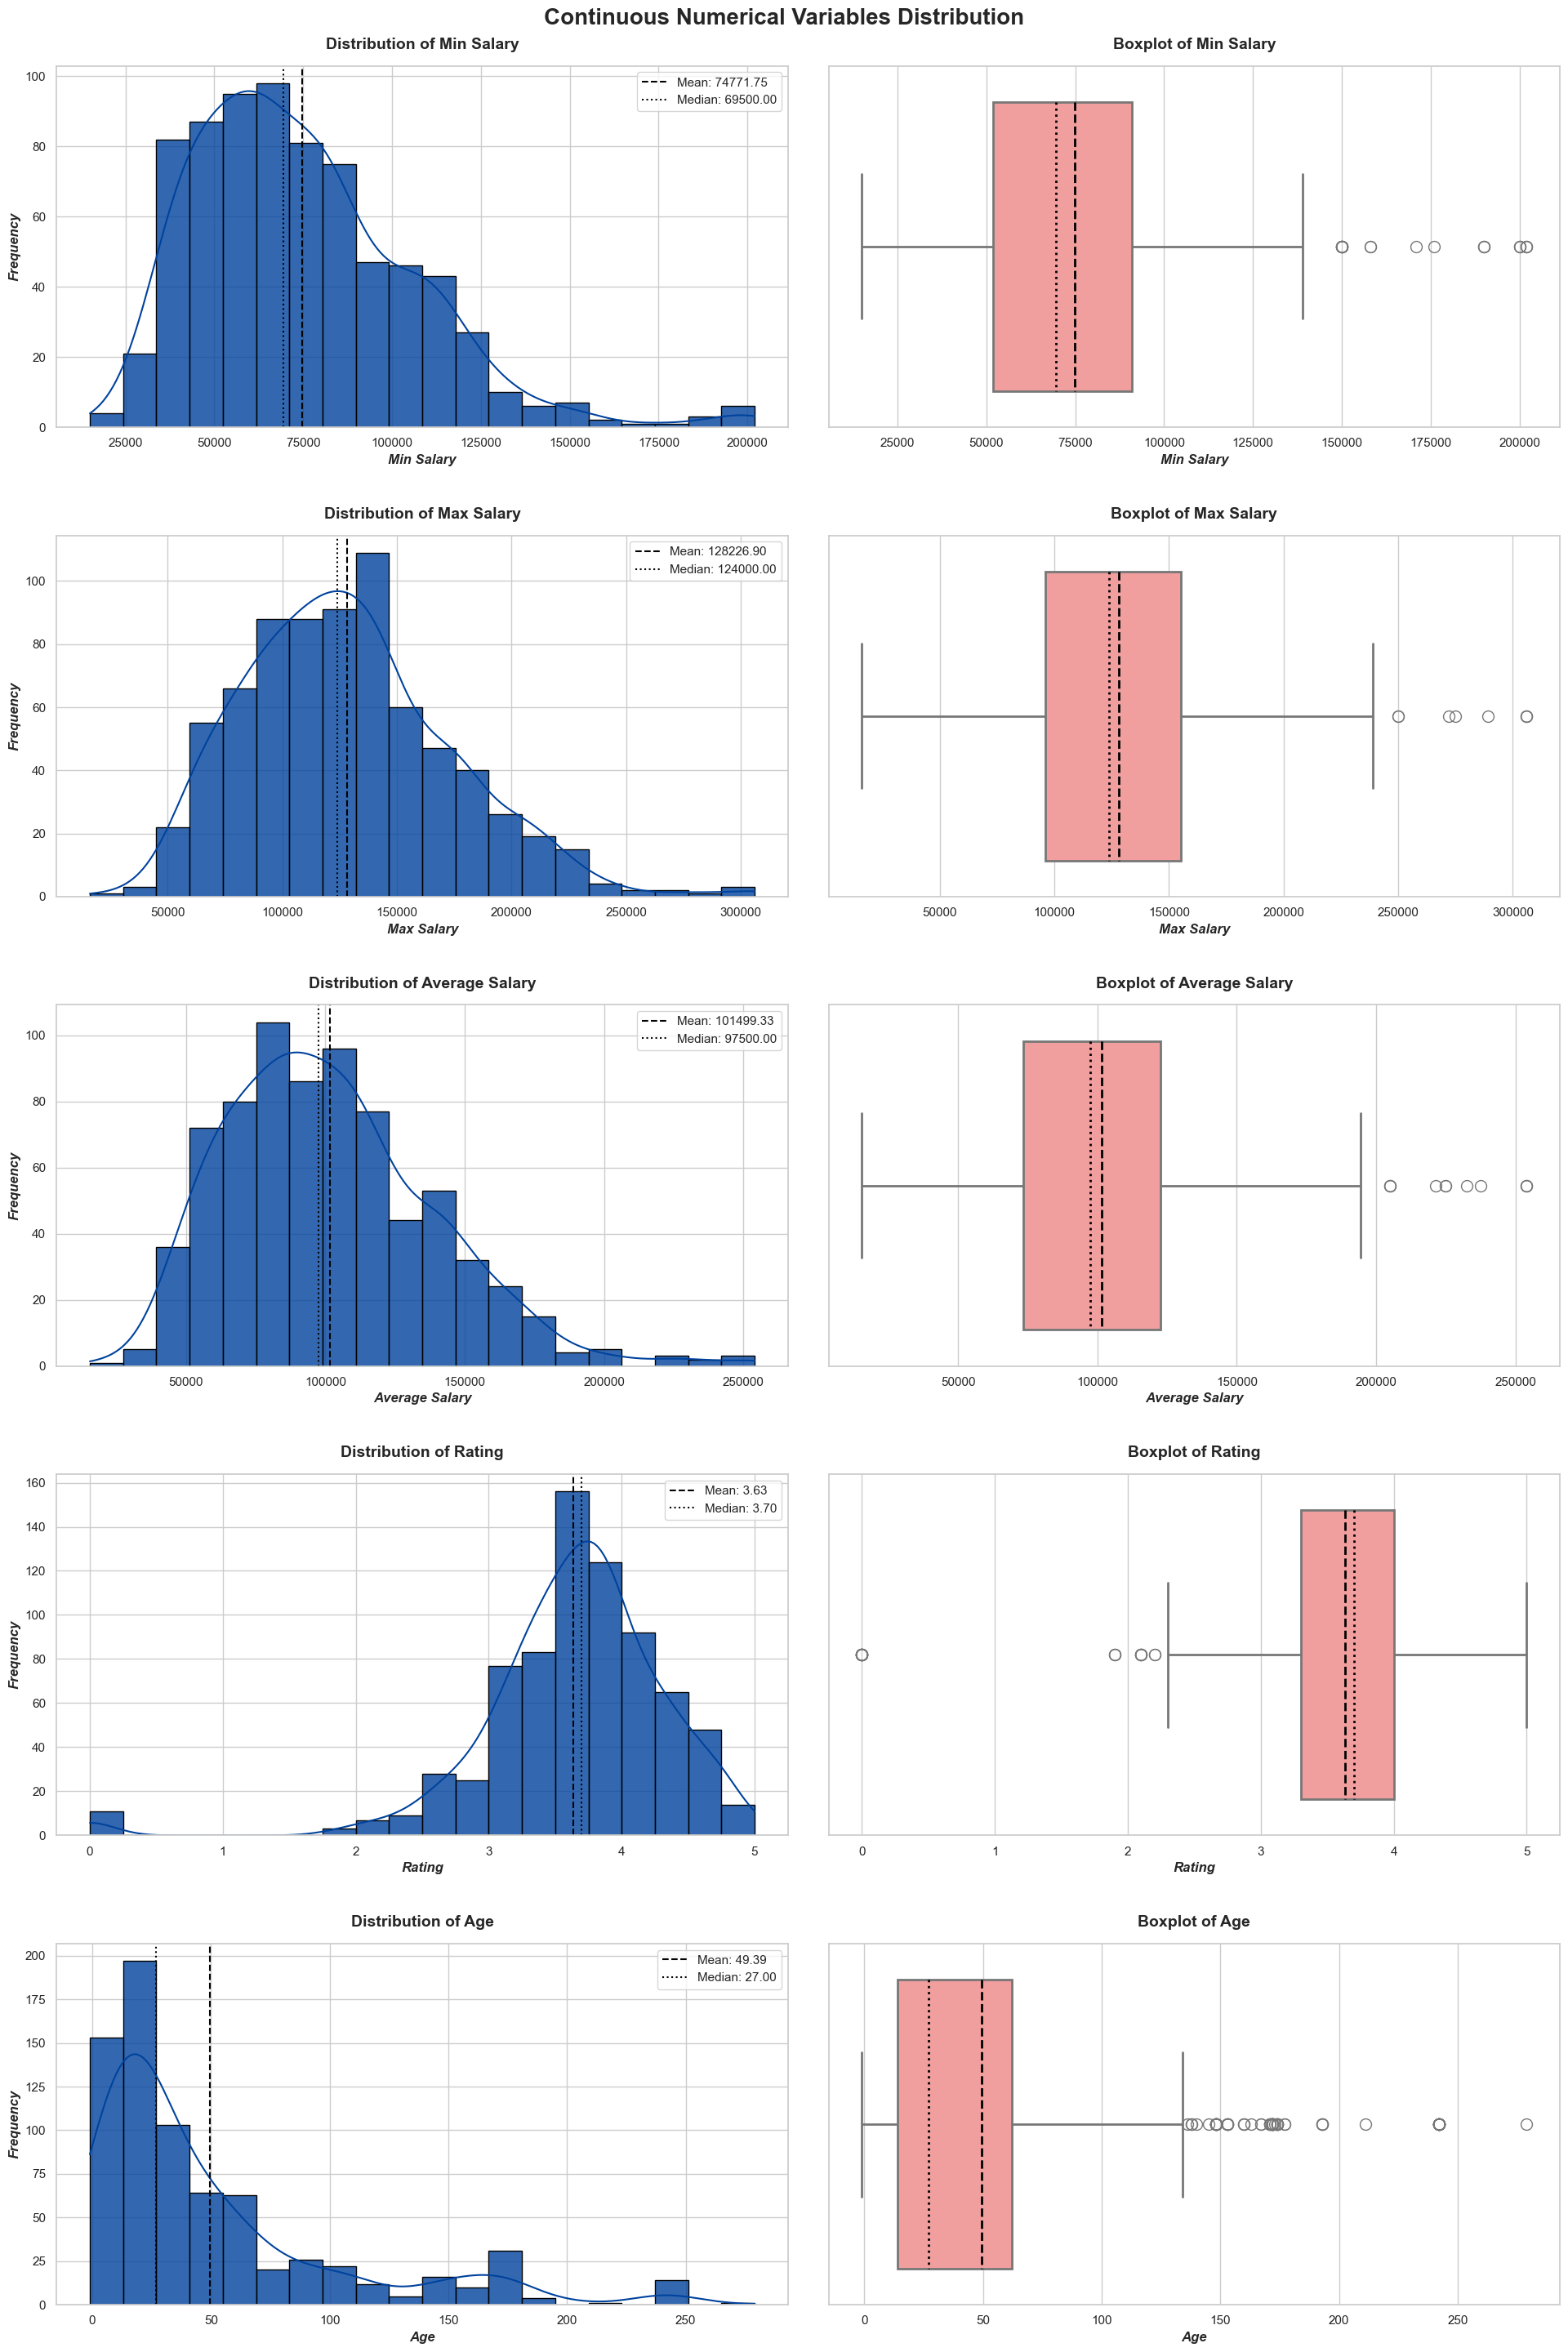

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))

for idx, col in enumerate(continuous_cols):
    sns.histplot(df[col], ax=axes[idx, 0], kde=True, bins=20, color=cmap10[0], alpha=0.8, edgecolor='black')

    mean_val   = df[col].mean()
    median_val = df[col].median()
    axes[idx, 0].axvline(mean_val  , color='black', linestyle='--'    , label=f'Mean: {mean_val:.2f}')
    axes[idx, 0].axvline(median_val, color='black', linestyle='dotted', label=f'Median: {median_val:.2f}')
    axes[idx, 0].legend()

    axes[idx, 0].set_title(f'Distribution of {col}', fontdict=font_tit, pad=15)
    axes[idx, 0].set_xlabel(col, fontdict=font_ax)
    axes[idx, 0].set_ylabel('Frequency', fontdict=font_ax)

    sns.boxplot(data=df, x=col, ax=axes[idx, 1], color=cmap10[6],
                fliersize=10, linewidth=2, showmeans=True, meanline=True,
                meanprops={'color': 'black', 'linestyle': '--', 'linewidth': 2},
                medianprops={'color': 'black', 'linestyle': 'dotted', 'linewidth': 2})

    axes[idx, 1].set_title(f'Boxplot of {col}', fontdict=font_tit, pad=15)
    axes[idx, 1].set_xlabel(col, fontdict=font_ax)

plt.suptitle('Continuous Numerical Variables Distribution', y=0.97, fontsize=20, fontweight='bold')
plt.tight_layout(pad=3)
plt.show()

##### ***Quan sát***

1. **Biểu đồ phân phối và Boxplot của "Min Salary" (Lương tối thiểu):**
   - **Phân phối:**
     - Phân phối lương tối thiểu có dạng gần giống phân phối chuẩn, nhưng hơi lệch phải.
     - **Trung bình (Mean):** 74771.75, **Trung vị (Median):** 69500.00.
     - Phần lớn giá trị tập trung trong khoảng từ 50,000 đến 100,000.
     - Có một số giá trị ngoại lệ (outliers) ở mức cao hơn 150,000.
   - **Boxplot:**
     - Boxplot cho thấy phạm vi dữ liệu chính nằm trong khoảng từ khoảng 50,000 đến 100,000.
     - Một số giá trị ngoại lệ xuất hiện ở mức cao hơn 150,000.
   - **Nhận xét:** Lương tối thiểu có mức trung bình và trung vị khá gần nhau, cho thấy sự phân bố tương đối đồng đều, nhưng có một số ngoại lệ cao.


2. **Biểu đồ phân phối và Boxplot của "Max Salary" (Lương tối đa):**
   - **Phân phối:**
     - Phân phối lương tối đa cũng có dạng gần phân phối chuẩn, nhưng lệch phải nhẹ.
     - **Trung bình (Mean):** 128226.90, **Trung vị (Median):** 124000.00.
     - Phần lớn giá trị tập trung trong khoảng từ 80,000 đến 150,000.
     - Có một số giá trị ngoại lệ ở mức trên 200,000.
   - **Boxplot:**
     - Boxplot cho thấy phạm vi chính nằm trong khoảng từ 80,000 đến 160,000.
     - Một số giá trị ngoại lệ xuất hiện ở mức cao hơn 200,000.
   - **Nhận xét:** Lương tối đa có trung bình và trung vị khá tương đồng, nhưng cũng xuất hiện các giá trị ngoại lệ cao.


3. **Biểu đồ phân phối và Boxplot của "Average Salary" (Lương trung bình):**
   - **Phân phối:**
     - Phân phối lương trung bình có dạng tương tự lương tối thiểu và tối đa, lệch phải nhẹ.
     - **Trung bình (Mean):** 101499.33, **Trung vị (Median):** 97500.00.
     - Phần lớn giá trị tập trung trong khoảng từ 70,000 đến 120,000.
     - Xuất hiện một số giá trị ngoại lệ ở mức cao hơn 200,000.
   - **Boxplot:**
     - Boxplot cho thấy phạm vi chính nằm trong khoảng từ 70,000 đến 120,000.
     - Một số giá trị ngoại lệ xuất hiện ở mức cao hơn 200,000.
   - **Nhận xét:** Lương trung bình phản ánh xu hướng tương tự lương tối thiểu và tối đa, với sự hiện diện của một số giá trị ngoại lệ cao.


4. **Biểu đồ phân phối và Boxplot của "Rating" (Đánh giá):**
   - **Phân phối:**
     - Phân phối đánh giá có dạng gần giống phân phối chuẩn, nhưng hơi lệch trái.
     - **Trung bình (Mean):** 3.63, **Trung vị (Median):** 3.70.
     - Phần lớn giá trị tập trung trong khoảng từ 3 đến 4.
     - Một số giá trị ngoại lệ thấp hơn 2 và cao hơn 4.5.
   - **Boxplot:**
     - Boxplot cho thấy phạm vi chính nằm trong khoảng từ 3 đến 4.
     - Có một số giá trị ngoại lệ ở cả hai phía (dưới 2 và trên 4.5).
   - **Nhận xét:** Đánh giá có xu hướng tập trung cao trong khoảng 3-4, với một vài ngoại lệ ở mức thấp và cao.


5. **Biểu đồ phân phối và Boxplot của "Age" (Tuổi công ty):**
   - **Phân phối:**
     - Phân phối tuổi có dạng lệch phải rõ rệt.
     - **Trung bình (Mean):** 49.39, **Trung vị (Median):** 27.00.
     - Phần lớn giá trị tập trung dưới 50 tuổi, nhưng có một số giá trị rất cao (trên 100 tuổi).
   - **Boxplot:**
     - Boxplot cho thấy phạm vi chính nằm trong khoảng từ khoảng 20 đến 50 tuổi.
     - Có nhiều giá trị ngoại lệ cao (trên 100 tuổi).
   - **Nhận xét:** Tuổi có phân phối lệch phải mạnh, với phần lớn giá trị tập trung ở mức thấp và một số ngoại lệ rất cao.


6. **Tổng kết:**
   - Các biến số về lương (Min Salary, Max Salary, Average Salary) có phân phối tương đối đồng đều với một số giá trị ngoại lệ cao.
   - Biến số "Rating" có phân phối gần chuẩn, tập trung ở mức trung bình cao.
   - Biến số "Age" có phân phối lệch phải mạnh với nhiều giá trị ngoại lệ cao, cần xem xét tính hợp lý của các giá trị này.

##### ***Quan sát biến Age dựa theo tổng kết vừa nêu***

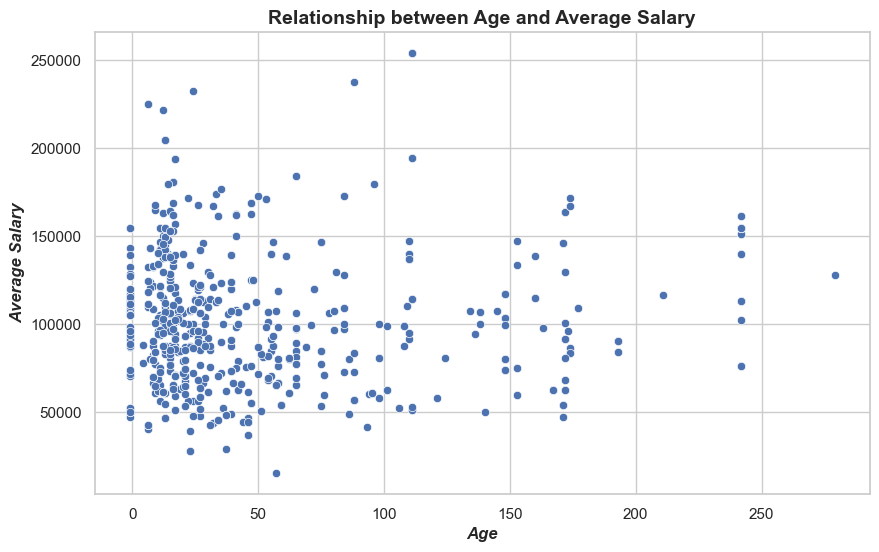

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Average Salary', data=df)
plt.title('Relationship between Age and Average Salary', fontdict=font_tit)
plt.xlabel('Age', fontdict=font_ax)
plt.ylabel('Average Salary', fontdict=font_ax)
plt.show()

1. **Tổng quan:** Biểu đồ phân tán này thể hiện mối quan hệ giữa tuổi của công ty (trục x) và mức lương trung bình trả cho nhân viên (trục y).

2. **Quan sát chính:**
   - **Công ty trẻ (0 - 50 tuổi):**
     - Phần lớn các công ty nằm trong nhóm tuổi từ **0 đến 50 năm**.
     - Mức lương trung bình dao động từ **50,000 USD đến 150,000 USD**, với một số công ty trả lương cao hơn (**200,000 USD trở lên**).
   - **Công ty lâu đời (> 50 tuổi):**
     - Một số công ty có tuổi đời trên **100 năm**, thậm chí vượt **200 năm**.
     - Các công ty này có mức lương trung bình phân tán, không tập trung ở một mức cụ thể.
   - **Mức lương cao:** Không có xu hướng rõ ràng giữa tuổi công ty và mức lương cao. Các công ty trẻ và lâu đời đều có thể trả lương cao.
   - **Phân tán dữ liệu:** Dữ liệu trở nên phân tán hơn ở các công ty lớn tuổi, không có mối quan hệ rõ ràng giữa tuổi công ty và mức lương trung bình.

3. **Kết luận:**
   - **Không có mối quan hệ tuyến tính rõ ràng** giữa tuổi công ty và mức lương trung bình.
   - **Công ty trẻ (dưới 50 tuổi)** chiếm phần lớn dữ liệu và có xu hướng trả lương tương đối đồng đều.
   - **Công ty lâu đời** (trên 100 năm) có thể cần được xem xét kỹ hơn, vì có thể bao gồm các tập đoàn lớn, tổ chức phi lợi nhuận, hoặc dữ liệu lỗi.

#### ***Phân phối của các biến số rời rạc***

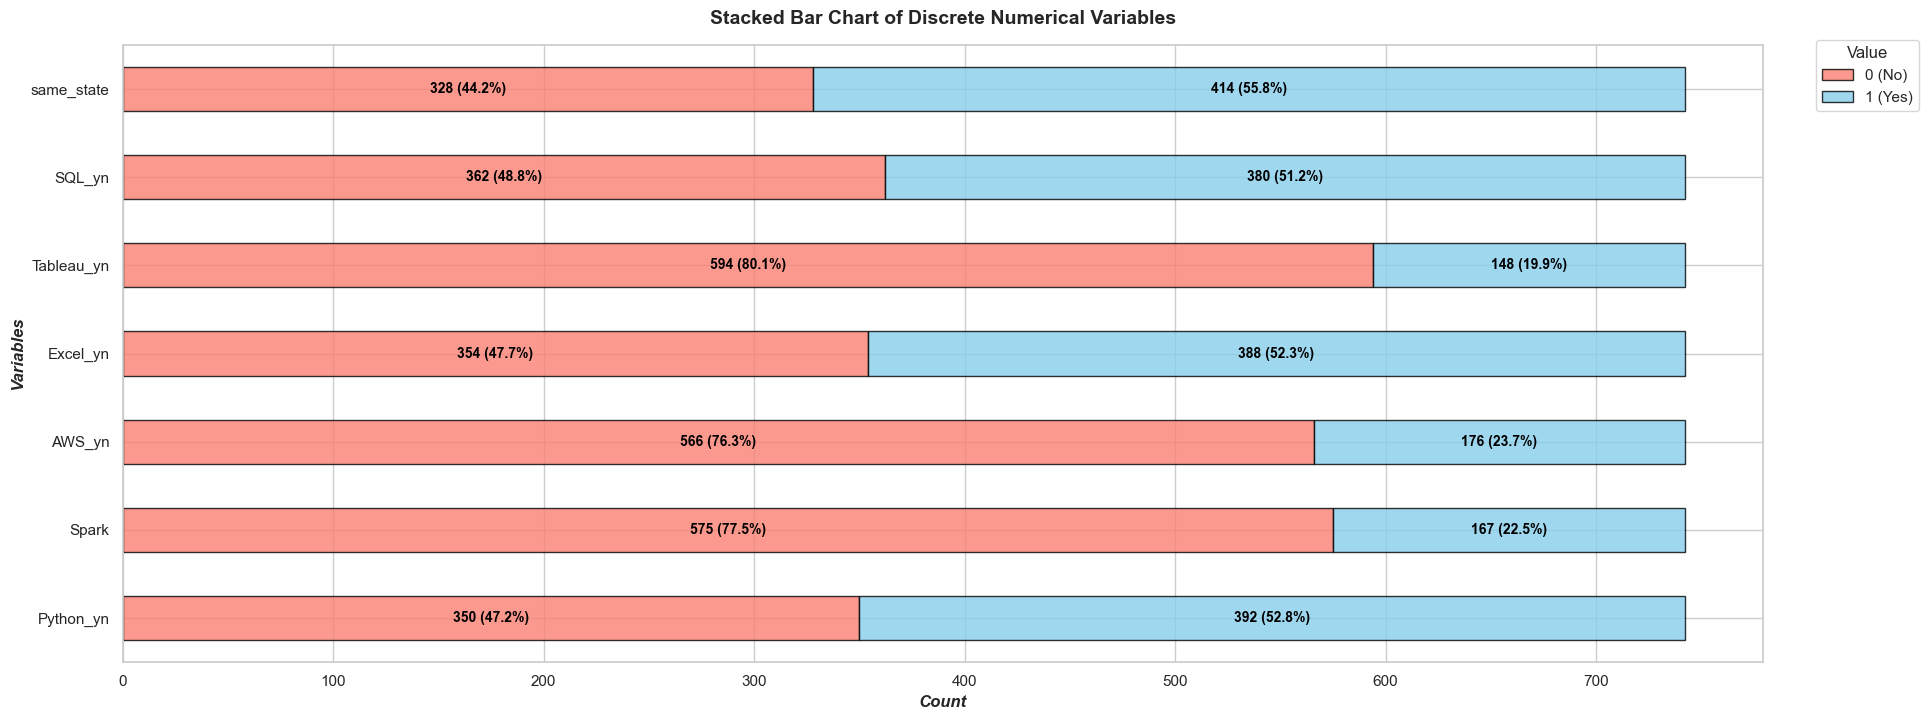

In [ ]:
counts         = df[discrete_cols].apply(pd.Series.value_counts).T
counts.columns = ['Count 0', 'Count 1']
percentages    = counts.div(counts.sum(axis=1), axis=0) * 100

_, ax = plt.subplots(figsize=(20, 8))
counts.plot(kind='barh', stacked=True, ax=ax, alpha=0.8, edgecolor='black', color=['salmon', 'skyblue'])

for i, (pct_0, pct_1, cnt_0, cnt_1) in enumerate(zip(percentages['Count 0'], percentages['Count 1'], counts['Count 0'], counts['Count 1'])):
    ax.text(cnt_0 / 2, i        , f'{cnt_0} ({pct_0:.1f}%)', va='center', ha='center', fontdict=font_txt)
    ax.text(cnt_0 + cnt_1 / 2, i, f'{cnt_1} ({pct_1:.1f}%)', va='center', ha='center', fontdict=font_txt)

plt.title('Stacked Bar Chart of Discrete Numerical Variables', fontdict=font_tit, pad=15)
plt.xlabel('Count', fontdict=font_ax)
plt.ylabel('Variables', fontdict=font_ax)
plt.legend(['0 (No)', '1 (Yes)'], title='Value', loc='upper right', bbox_to_anchor=(1.1, 1.02))

plt.tight_layout(pad=3)
plt.show()

##### ***Quan sát***

Biểu đồ này thể hiện sự phân phối của các biến phân loại nhị phân (0 hoặc 1) dưới dạng cột chồng.

---

**1. "same_state"**
- **Số liệu:**
  - **0 (No):** 328 (44.2%).
  - **1 (Yes):** 414 (55.8%).
- **Nhận xét:** Phần lớn các giá trị thuộc nhóm "Yes", cho thấy hơn một nửa số người được khảo sát làm việc trong cùng một bang.

---

**2. "SQL_yn"**
- **Số liệu:**
  - **0 (No):** 362 (48.8%).
  - **1 (Yes):** 380 (51.2%).
- **Nhận xét:** Tỷ lệ giữa "Yes" và "No" khá cân bằng, với một chút ưu thế thuộc về nhóm "Yes". Điều này cho thấy gần một nửa số người được khảo sát có kỹ năng SQL.

---

**3. "Tableau_yn"**
- **Số liệu:**
  - **0 (No):** 594 (80.1%).
  - **1 (Yes):** 148 (19.9%).
- **Nhận xét:**
  - Phần lớn các giá trị thuộc nhóm "No", cho thấy chỉ một phần nhỏ người tham gia khảo sát có kỹ năng sử dụng Tableau.

---

**4. "Excel_yn"**
- **Số liệu:**
  - **0 (No):** 354 (47.7%).
  - **1 (Yes):** 388 (52.3%).
- **Nhận xét:** Tỷ lệ giữa "Yes" và "No" khá cân bằng, với một chút ưu thế thuộc về nhóm "Yes". Điều này cho thấy kỹ năng Excel phổ biến hơn một chút so với không có.

---

**5. "AWS_yn"**
- **Số liệu:**
  - **0 (No):** 566 (76.3%).
  - **1 (Yes):** 176 (23.7%).
- **Nhận xét:** Phần lớn các giá trị thuộc nhóm "No", cho thấy chỉ một phần nhỏ người tham gia khảo sát có kỹ năng liên quan đến AWS.

---

**6. "Spark"**
- **Số liệu:**
  - **0 (No):** 575 (77.5%).
  - **1 (Yes):** 167 (22.5%).
- **Nhận xét:** Tương tự như AWS, đa số người tham gia khảo sát không có kỹ năng Spark, với tỷ lệ rất cao thuộc nhóm "No".

---

**7. "Python_yn"**
- **Số liệu:**
  - **0 (No):** 350 (47.2%).
  - **1 (Yes):** 392 (52.8%).
- **Nhận xét:** Tỷ lệ giữa "Yes" và "No" khá cân bằng, với một chút ưu thế thuộc về nhóm "Yes". Điều này cho thấy Python là một kỹ năng phổ biến hơn so với không có.

---

**Tổng kết:**
- Các kỹ năng phổ biến nhất (với tỷ lệ "Yes" cao hơn 50%) là **Python**, **Excel**, và **SQL**.
- Các kỹ năng ít phổ biến hơn (với tỷ lệ "Yes" thấp hơn 50%) là **Tableau**, **AWS**, và **Spark**.
- Đối với biến "same_state", hơn một nửa số người tham gia khảo sát làm việc trong cùng một bang.

### **b. Xem xét tổng quan các biến phân loại**

#### ***Phân phối của các biến phân loại***

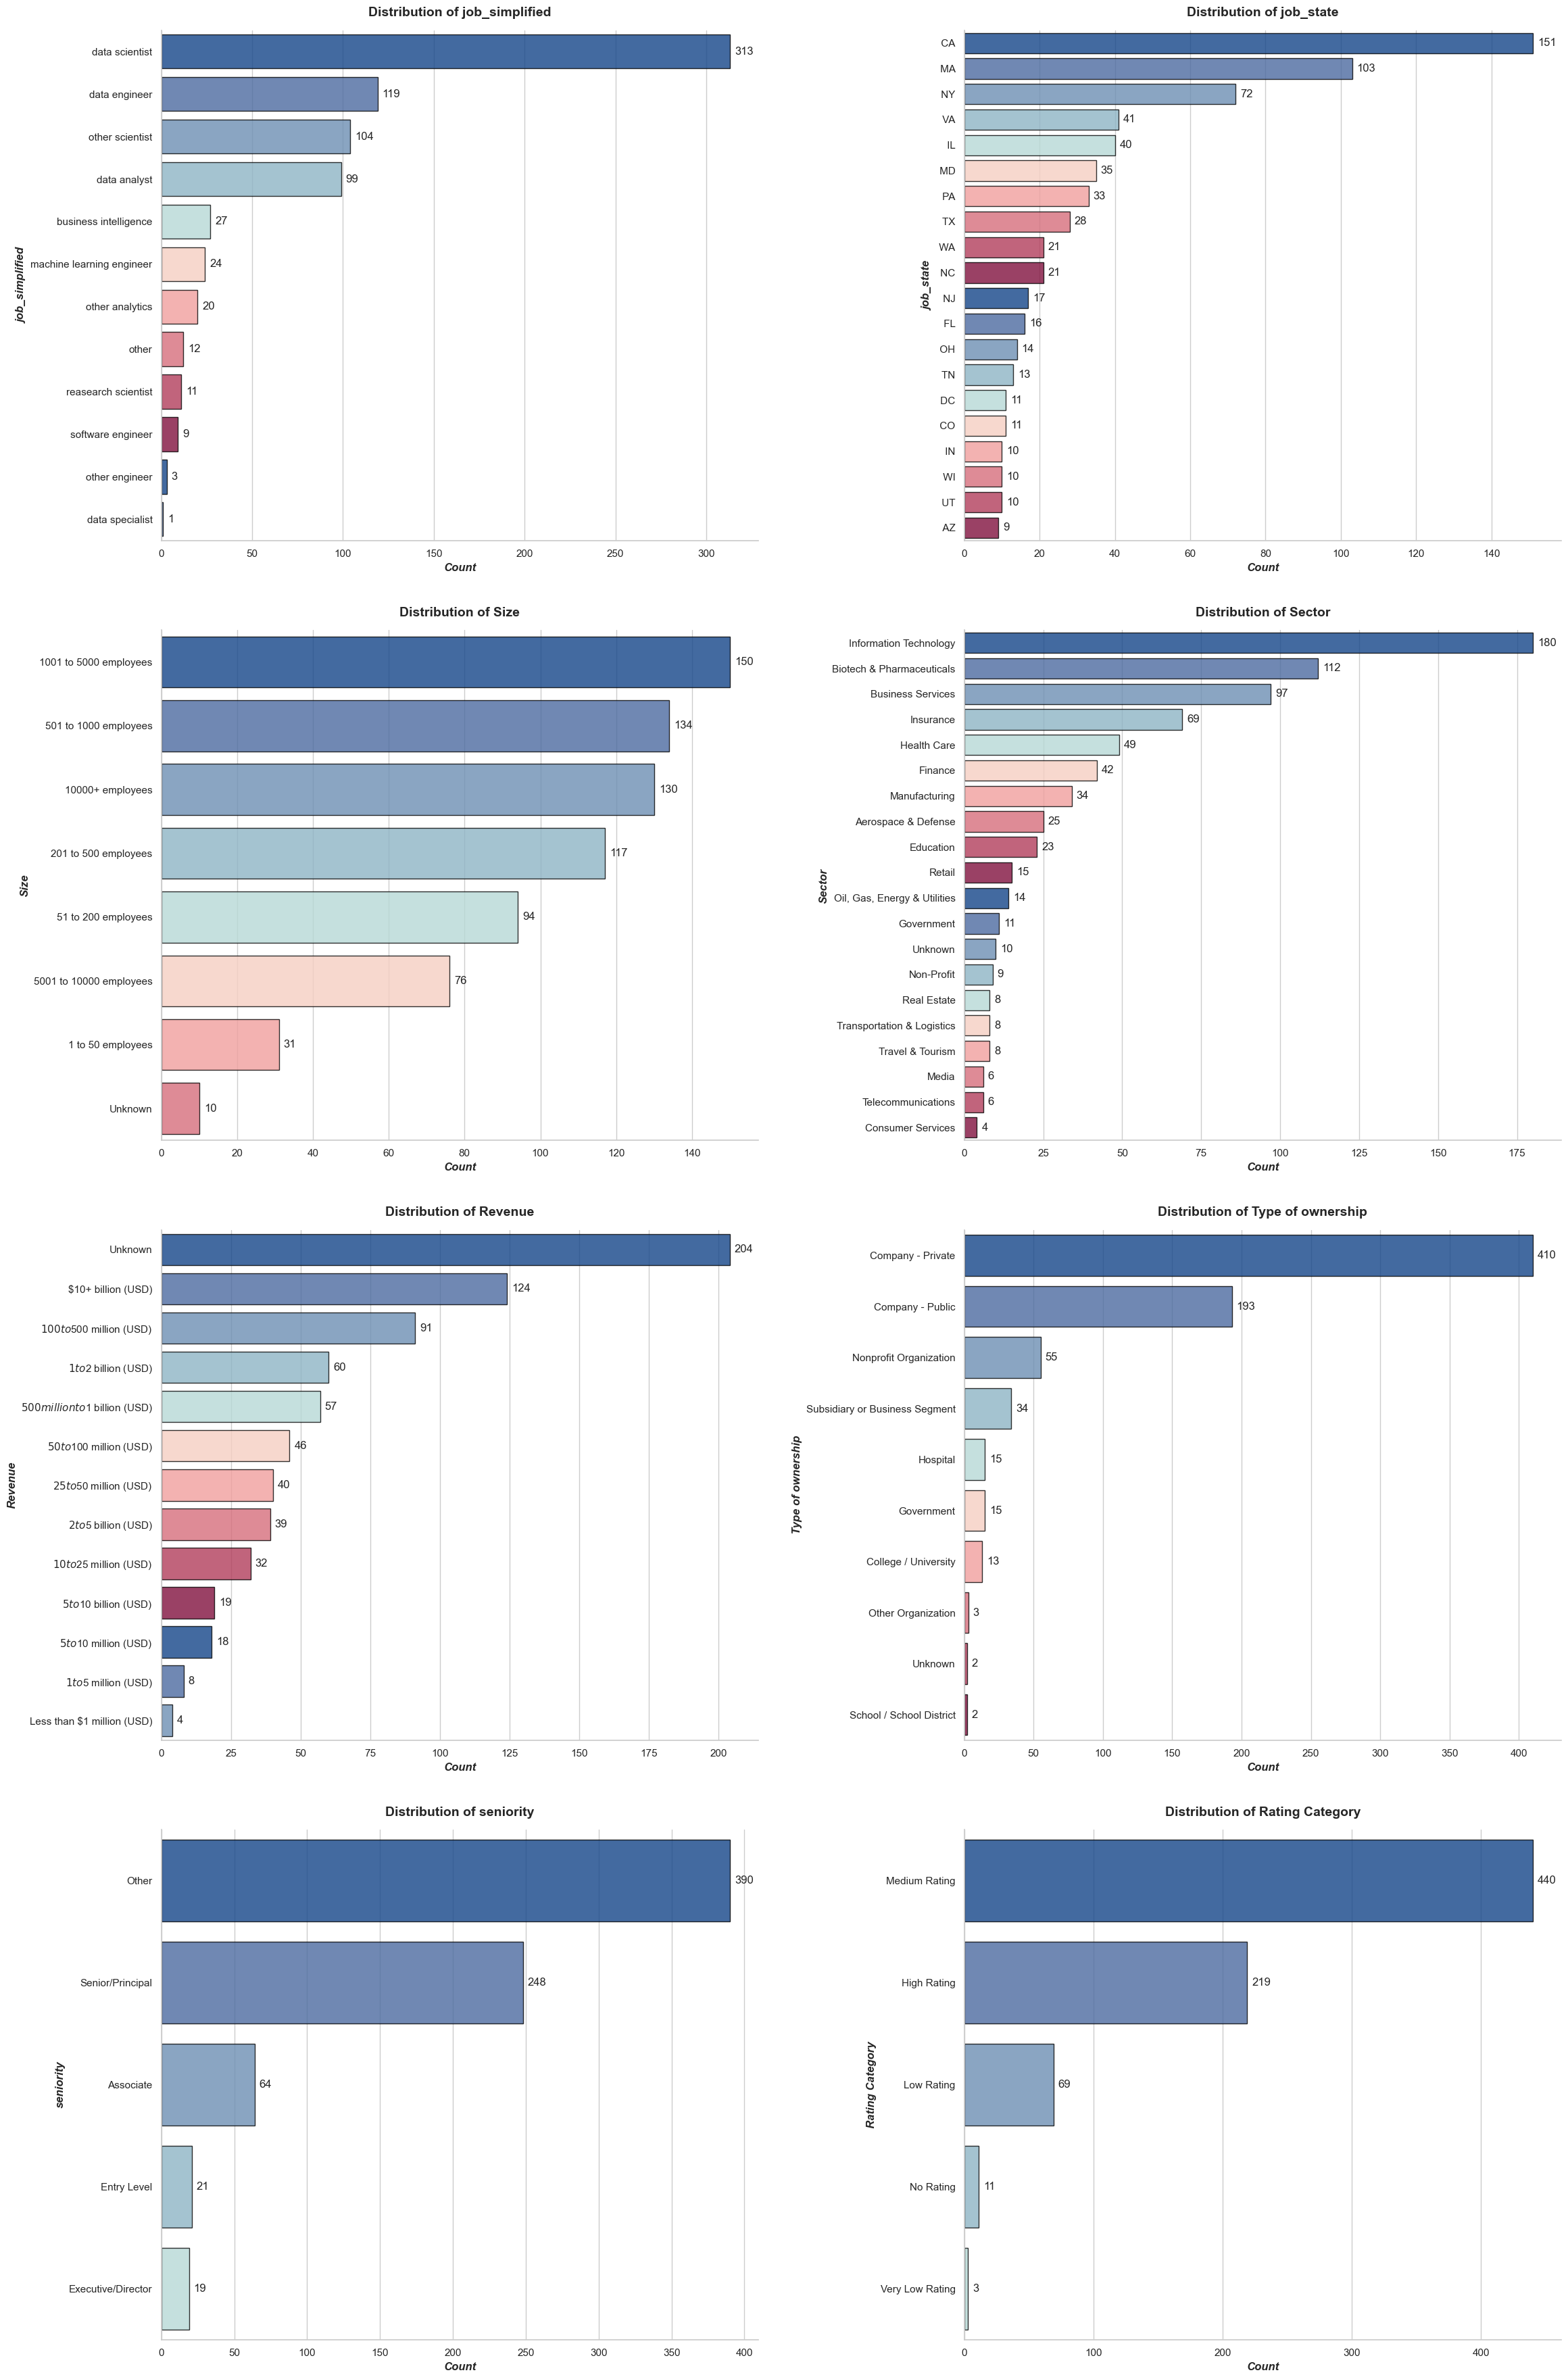

In [ ]:
object_columns = ['job_simplified', 'job_state', 'Size', 'Sector', 'Revenue',
                  'Type of ownership', 'seniority', 'Rating Category']
fig, axes = plt.subplots(4, 2, figsize=(24, 36))

for col, ax in zip(object_columns, axes.ravel()):
    value_counts = df[col].value_counts().head(20)

    sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax, palette=cmap10, alpha=0.8, edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontdict=font_tit, pad=15)
    ax.set_xlabel('Count', fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

##### ***Quan sát***

**1. Phân phối công việc (Job Simplified)**
- **Data Scientist** là vai trò phổ biến nhất với 313 vị trí, cao hơn nhiều so với các vị trí khác.
- Các vị trí như **Data Engineer** (119), **Other Scientist** (104), và **Data Analyst** (99) cũng có số lượng đáng kể.
- Các vai trò ít phổ biến hơn bao gồm **Software Engineer** (9) và **Other Engineer** (8).

---
**2. Phân phối theo bang (Job State)**
- **California (CA)** dẫn đầu với 151 công việc, tiếp theo là **Massachusetts (MA)** (103) và **New York (NY)** (72).
- Các bang khác như **Virginia (VA)**, **Illinois (IL)**, và **Texas (TX)** có số lượng công việc tương đối thấp hơn.

---
**3. Phân phối quy mô công ty (Size)**
- Các công ty có quy mô từ **1001 đến 5000 nhân viên** chiếm tỷ lệ cao nhất (150).
- Các công ty từ **501-1000** (134) và **hơn 10,000 nhân viên** (130) cũng chiếm phần lớn.
- Quy mô nhỏ hơn (1-50 nhân viên) và **chưa xác định** có số lượng ít nhất.

---
**4. Phân phối lĩnh vực (Sector)**
- **Công nghệ thông tin (Information Technology)** là lĩnh vực phổ biến nhất (180 công việc), tiếp theo là **Công nghệ sinh học & Dược phẩm** (112) và **Dịch vụ doanh nghiệp** (97).
- Các lĩnh vực ít phổ biến hơn bao gồm **Bất động sản**, **Truyền thông** và **Giải trí**.

---
**5. Phân phối doanh thu (Revenue)**
- **Doanh thu chưa được xác định** chiếm phần lớn nhất (204 công ty).
- Các công ty có doanh thu trên **10 tỷ USD** (124) cũng chiếm tỷ trọng lớn.
- Các mức doanh thu nhỏ hơn, như dưới **1 triệu USD**, có số lượng rất ít.

---
**6. Phân phối loại hình sở hữu (Type of Ownership)**
- **Công ty tư nhân (Private)** chiếm phần lớn nhất (410), tiếp theo là **Công ty đại chúng (Public)** (193).
- Các tổ chức phi lợi nhuận (55) và các tổ chức thuộc chính phủ (15) có số lượng khiêm tốn.

---
**7. Phân phối thâm niên (Seniority)**
- Nhóm **khác** (Other) chiếm đa số (390 vị trí), tiếp theo là **Senior/Principal** (248).
- Các cấp độ thấp hơn như **Associate** (64) và **Entry Level** (21) chiếm tỷ lệ nhỏ.
- Vị trí **Executive/Director** ít phổ biến nhất (2).

---
**8. Phân phối đánh giá công ty (Rating Category)**
- **Medium Rating** (xếp hạng trung bình) chiếm ưu thế với 440 công ty.
- **High Rating** (xếp hạng cao) có 219 công ty, trong khi nhóm **Low Rating** (xếp hạng thấp) chỉ chiếm 69.
- Nhóm không có đánh giá hoặc đánh giá rất thấp có số lượng không đáng kể.

---
**Tổng quan**:
Biểu đồ này phản ánh rằng:
- **Data Scientist** là công việc phổ biến nhất, tập trung nhiều tại các bang lớn như California và Massachusetts.
- Các công ty lớn và lĩnh vực công nghệ thông tin, công nghệ sinh học thường chiếm ưu thế.
- Hầu hết các công ty được đánh giá ở mức trung bình hoặc cao, với đa số thuộc sở hữu tư nhân.
- Các cấp độ thâm niên cao như Senior/Principal chiếm tỷ lệ lớn, cho thấy nhu cầu cao về nhân lực giàu kinh nghiệm.

Biểu đồ cung cấp một cái nhìn toàn diện về thị trường việc làm trong ngành dữ liệu, hữu ích cho việc phân tích xu hướng và đưa ra các chiến lược phát triển phù hợp.

#### ***Top-20 các giá trị của một số biến phân loại trọng tâm***

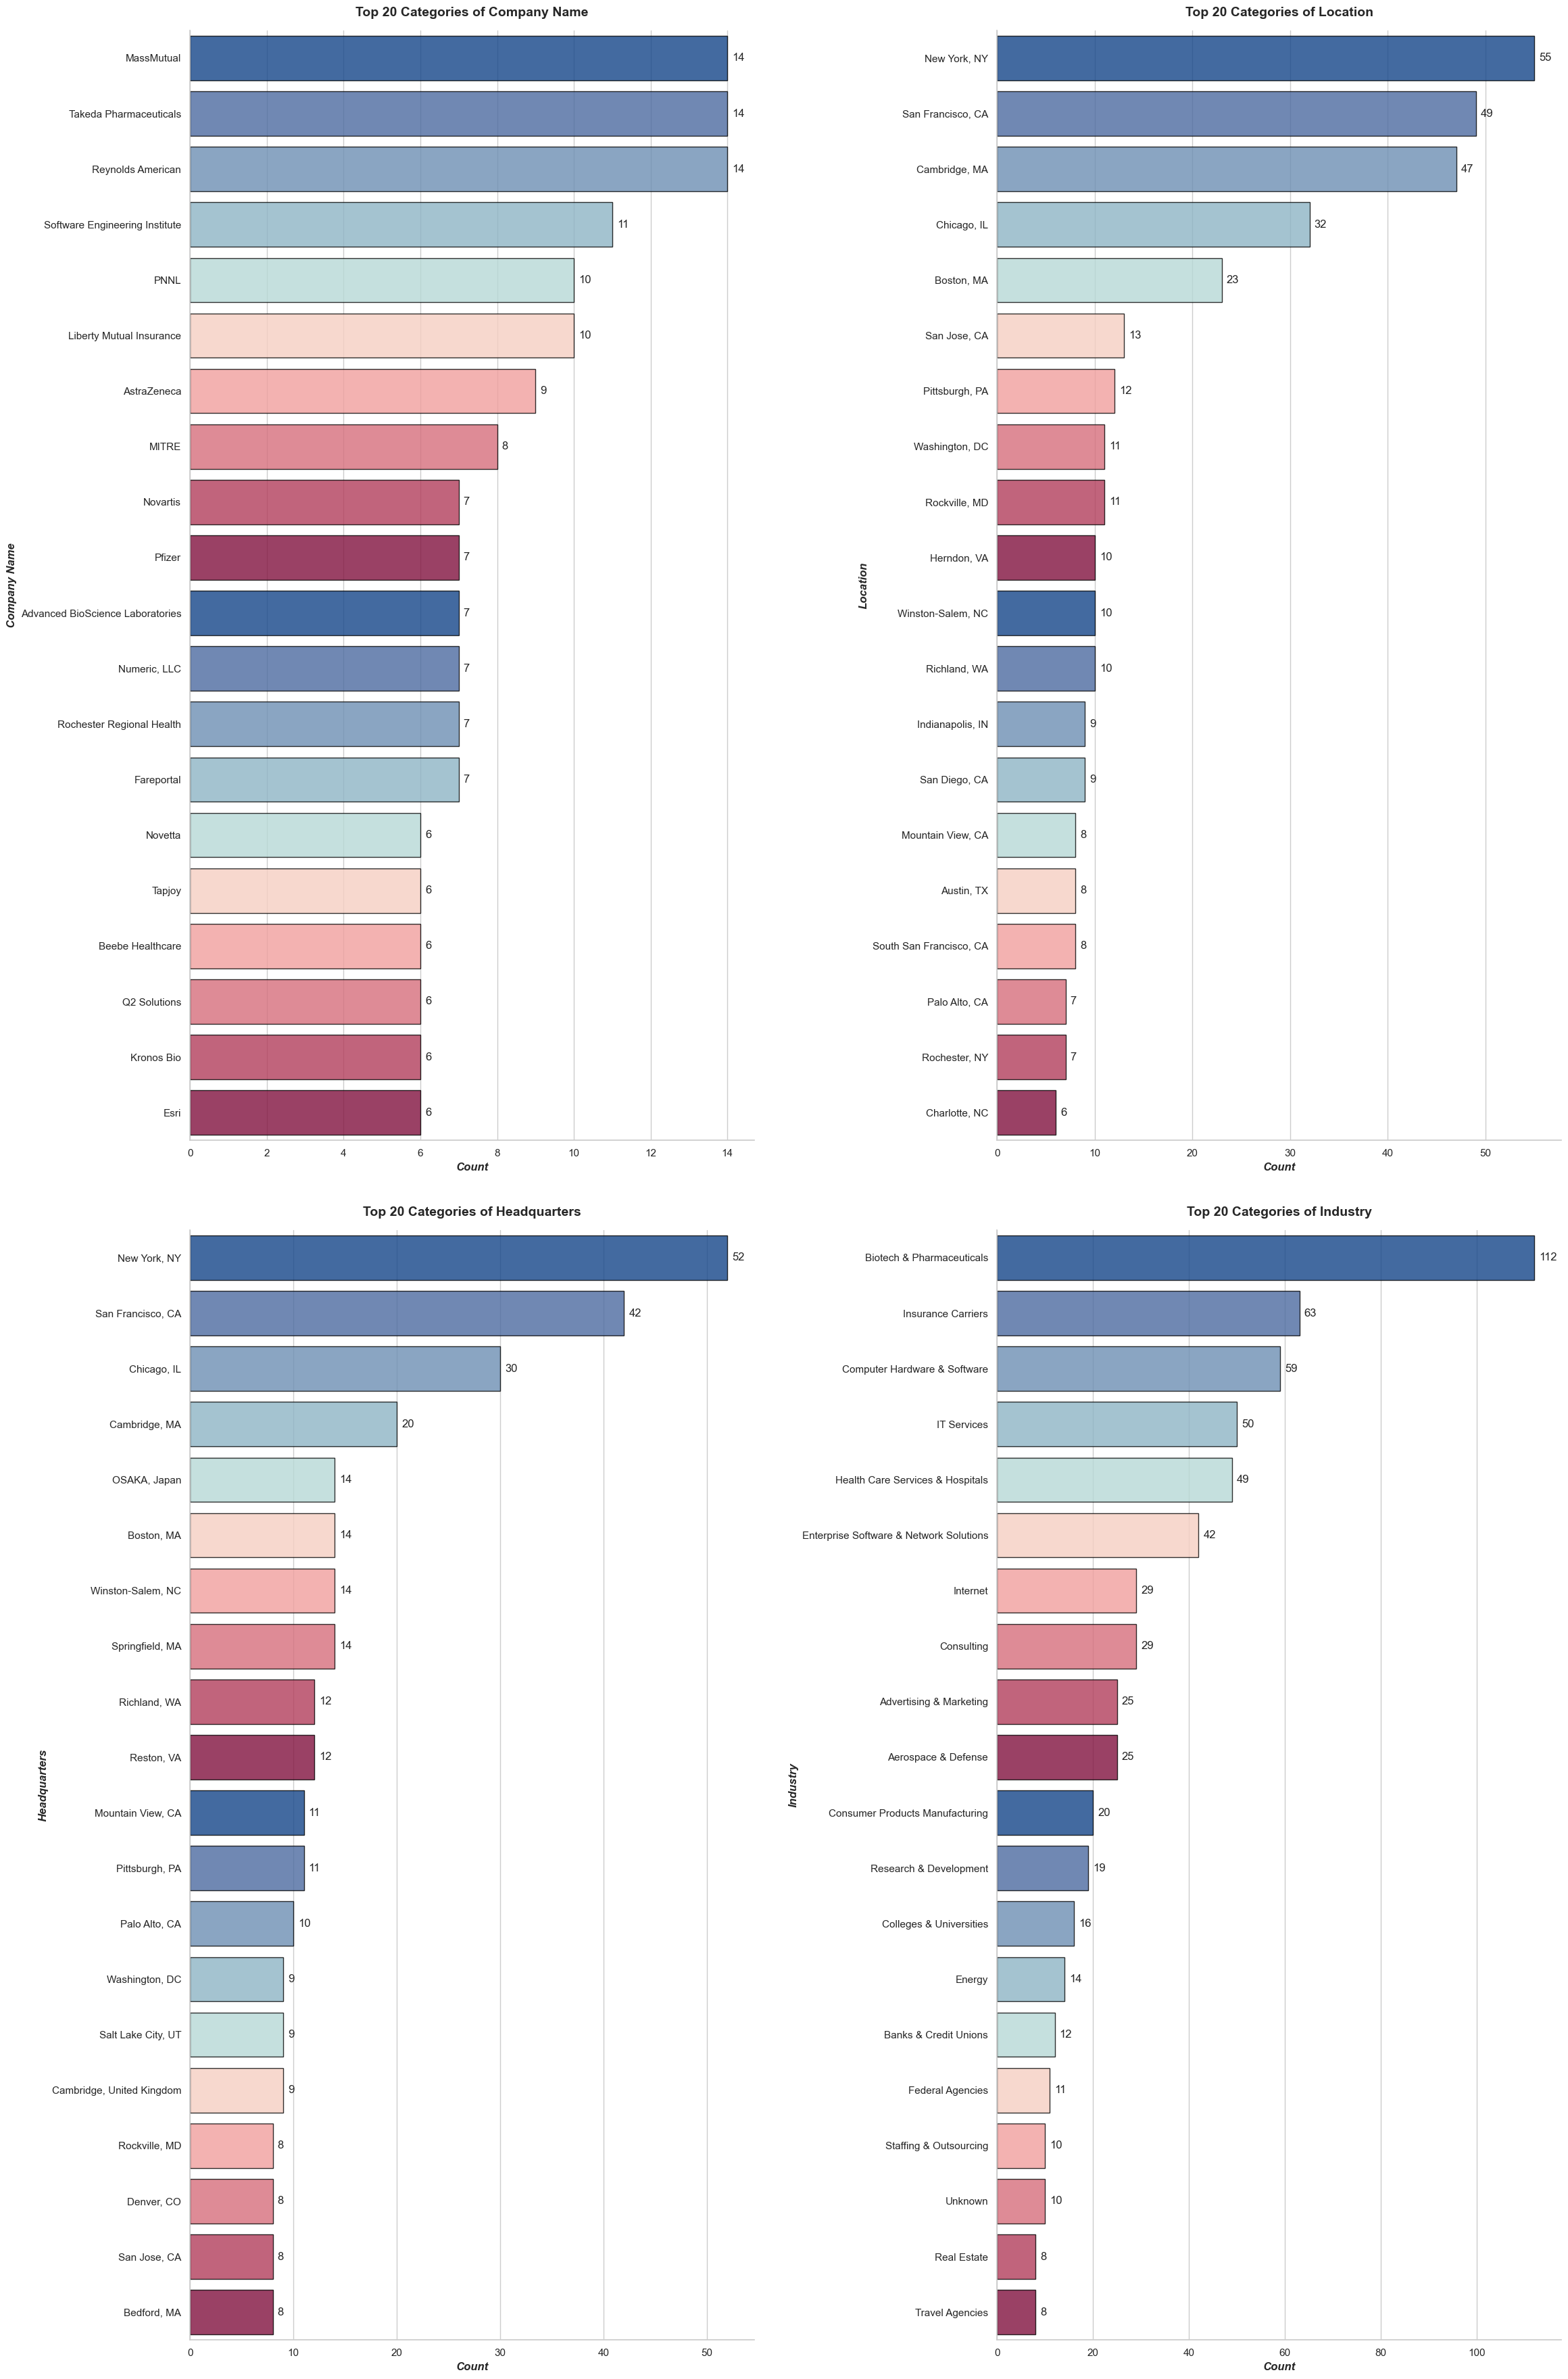

In [ ]:
# Lấy danh sách các cột kiểu object
all_object_columns = df.select_dtypes(include=['object']).columns

# Loại trừ những cột trong danh sách object_columns
excluded_object_columns = [col for col in all_object_columns if col not in object_columns]

fig, axes = plt.subplots(2, 2, figsize=(24, 36))

for col, ax in zip(excluded_object_columns, axes.ravel()):
    value_counts = df[col].value_counts().head(20)

    sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax, palette=cmap10, alpha=0.8, edgecolor='black')
    ax.set_title(f'Top 20 Categories of {col}', fontdict=font_tit, pad=15)
    ax.set_xlabel('Count', fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

##### ***Quan sát***

**1. Top 20 tên công ty (Company Name)**
- **MassMutual**, **Reynolds American**, và **Takeda Pharmaceuticals** là các công ty đứng đầu danh sách, mỗi công ty có 14 mục.
- Một số công ty nổi bật khác bao gồm **Software Engineering Institute** (11), **PNNL** (10), và **Liberty Mutual Insurance** (10).
- Các công ty có số lượng ít hơn nhưng vẫn nằm trong danh sách gồm **Novetta**, **Q2 Solutions**, **Esri**, và **Teiphy** (mỗi công ty 6 mục).
- Danh sách này bao gồm các công ty hoạt động trong nhiều lĩnh vực khác nhau, từ bảo hiểm, dược phẩm đến công nghệ và nghiên cứu.

---

**2. Top 20 địa điểm (Location)**
- **New York, NY** là địa phương có số lượng vị trí công việc cao nhất (55), theo sau là **San Francisco, CA** (49) và **Cambridge, MA** (47).
- Các thành phố lớn khác như **Chicago, IL** (32), **Boston, MA** (23), và **San Jose, CA** (13) cũng có số lượng đáng kể.
- Một số địa phương ít phổ biến hơn nhưng vẫn lọt vào danh sách bao gồm **Austin, TX** (8), **South San Francisco, CA** (8), và **Salt Lake City, UT** (6).

---

**3. Top 20 trụ sở chính (Headquarters)**
- **New York, NY** dẫn đầu với 52 công ty đặt trụ sở tại đây.
- **San Francisco, CA** (42) và **Chicago, IL** (30) giữ các vị trí cao tiếp theo.
- **Cambridge, MA** (20), **Springfield, MA** (14), và **Boston, MA** (14) là các khu vực có vai trò quan trọng trong việc đặt trụ sở của các công ty lớn.
- Một số địa điểm quốc tế như **Osaka, Nhật Bản** (14) và **Cambridge, Vương quốc Anh** (9) cũng xuất hiện trong danh sách.

---

**4. Top 20 ngành công nghiệp (Industry)**
- **Công nghệ sinh học và dược phẩm (Biotech & Pharmaceuticals)** là ngành dẫn đầu với 112 mục.
- **Bảo hiểm (Insurance Carriers)** (63), **Phần cứng và phần mềm máy tính (Computer Hardware & Software)** (59), và **Dịch vụ CNTT (IT Services)** (50) là các ngành chiếm ưu thế lớn.
- Các ngành khác như **Dịch vụ chăm sóc sức khỏe và bệnh viện (Health Care Services & Hospitals)** (49) và **Phần mềm doanh nghiệp và giải pháp mạng (Enterprise Software & Network Solutions)** (42) cũng có số lượng lớn.
- Các ngành ít phổ biến hơn nhưng vẫn có vai trò quan trọng bao gồm **Ngân hàng (Banks & Credit Unions)** (12), **Năng lượng (Energy)** (14), và **Cơ quan chính phủ liên bang (Federal Agencies)** (11).

---

**Tổng quan:**
- **Tên công ty**: Các công ty nổi bật tập trung ở các lĩnh vực như bảo hiểm, dược phẩm và công nghệ.
- **Địa điểm**: Các thành phố lớn như New York, San Francisco, và Cambridge là nơi tập trung nhiều cơ hội việc làm.
- **Trụ sở chính**: Các công ty thường đặt trụ sở tại các trung tâm kinh tế lớn ở Mỹ, với một số trụ sở quốc tế.
- **Ngành công nghiệp**: Công nghệ sinh học, bảo hiểm, và phần mềm là các ngành dẫn đầu trong danh sách.

## **2.2. Analysis (Bivariate Analysis)**

### **a. Nhóm Job** (job_simplified, seniority, Industry, Sector)

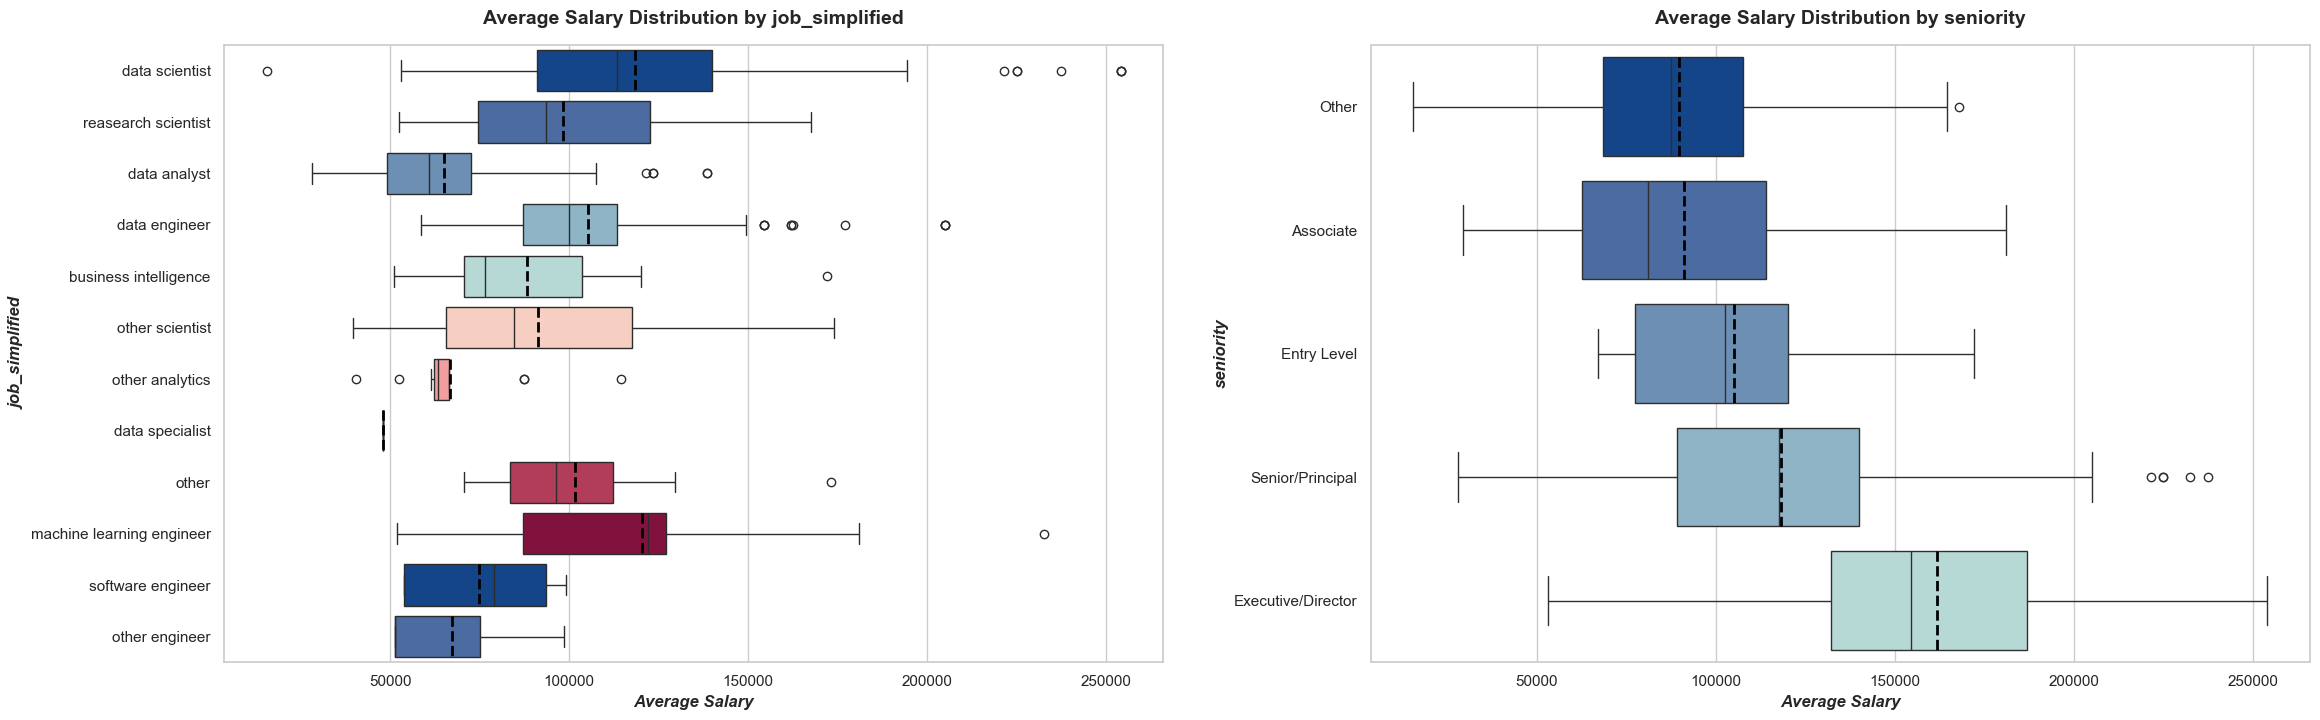

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(24, 8))

for col, ax in zip(['job_simplified', 'seniority'], axes):
    sns.boxplot(data=df, x='Average Salary', y=col, ax=ax, palette=cmap10,
                showmeans=True, meanline=True,
                meanprops={'color': 'black', 'linestyle': '--', 'linewidth': 2})

    mean_salary = df.groupby(col)['Average Salary'].mean().sort_values()

    ax.set_title(f'Average Salary Distribution by {col}', fontdict=font_tit, pad=15)
    ax.set_xlabel("Average Salary", fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

plt.tight_layout(pad=3)
plt.show()

1. **Phân phối lương theo chức danh công việc:**
    - Những công việc liên quan trực tiếp đến khoa học dữ liệu và trí tuệ nhân tạo (như Data Scientist, Machine Learning Engineer) có mức lương cao nhất, phản ánh nhu cầu và giá trị lớn của các vai trò này trên thị trường.
    - Những công việc liên quan đến phân tích dữ liệu hoặc chuyên biệt hơn (như Data Analyst, Business Intelligence) có mức lương thấp hơn.


2. **Phân phối lương theo cấp bậc:**
   - **Cao nhất:**  **Executive/Director:** Lương trung bình 130,000–185,000, một số ngoại lệ vượt 250,000.  
   - **Trung bình:**  **Senior/Principal:** Lương trung bình 90,000–140,000, một số ngoại lệ trên 200,000.  
   - **Thấp:**  **Other:** Lương 70,000–110,000, ít giá trị ngoại lệ.  


3. **Nhận xét chung:**
   - Các nhóm công việc và cấp bậc cao hơn có mức lương vượt trội so với các nhóm khác.  
   - Công việc và cấp bậc thấp hơn có mức lương trung bình thấp và phân phối hẹp.

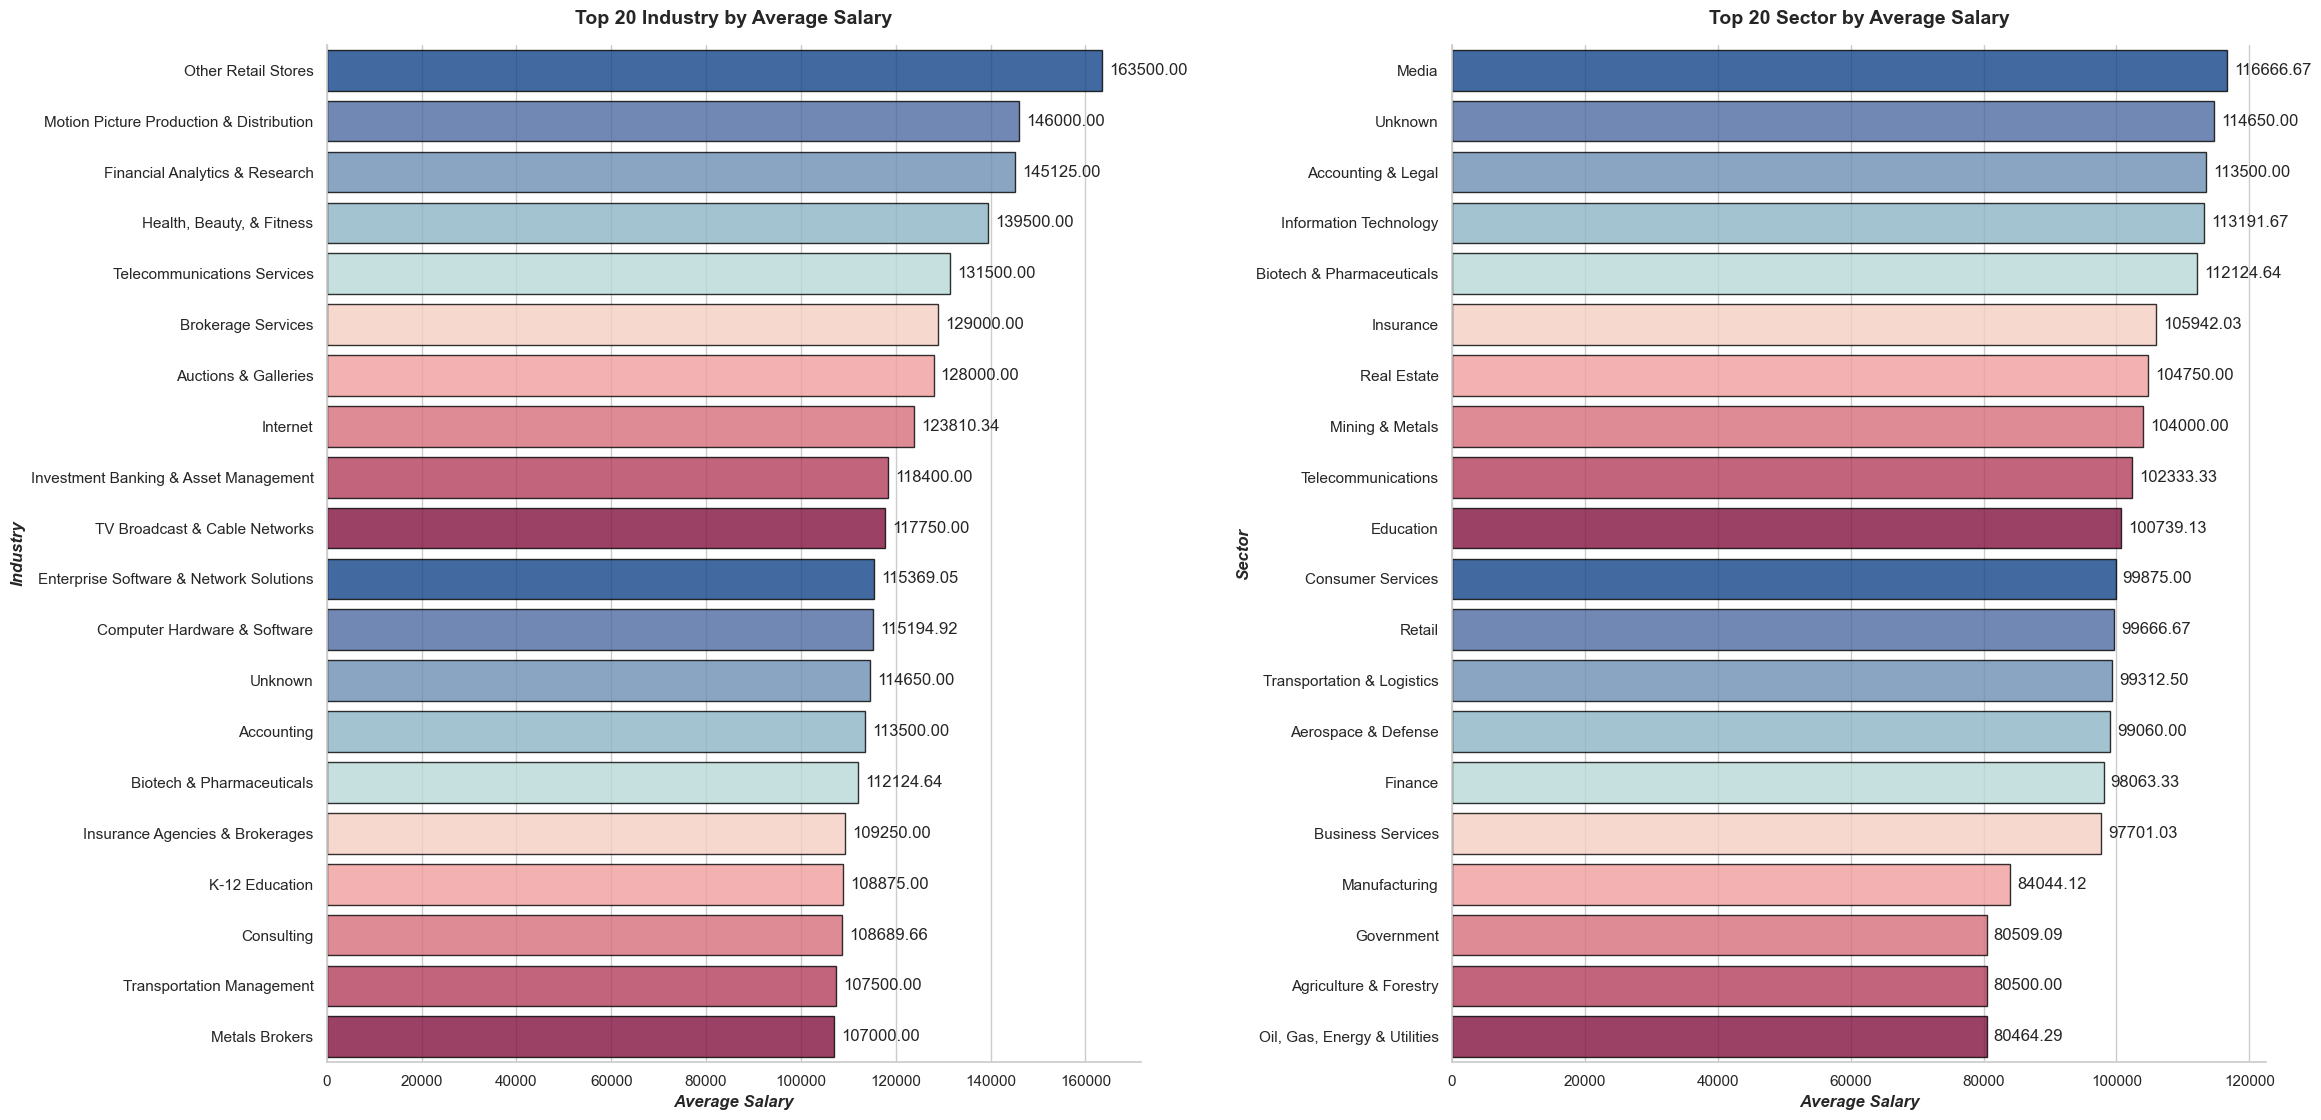

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

for col, ax in zip(['Industry', 'Sector'], axes):
    avg_salary_by_category = df.groupby(col)["Average Salary"].mean().sort_values(ascending=False)
    top_n                  = avg_salary_by_category.head(20)

    sns.barplot(x=top_n.values, y=top_n.index, palette=cmap10, ax=ax, alpha=0.8, edgecolor='black')

    ax.set_title(f'Top 20 {col} by Average Salary', fontdict=font_tit, pad=15)
    ax.set_xlabel("Average Salary", fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

1. **Top 20 ngành công nghiệp (Industry) theo mức lương trung bình**

   - **Quan sát chính:**
     - **Ngành có mức lương trung bình cao nhất:**
     - **Other Retail Stores:** 163,500.
     - **Motion Picture Production & Distribution:** 146,000.
     - **Financial Analytics & Research:** 145,125.
   
   - **Các ngành có mức lương cao tiếp theo:**
     - **Health, Beauty, & Fitness:** 139,500.
     - **Telecommunications Services:** 131,500.
     - **Brokerage Services:** 129,000.
     - **Auctions & Galleries:** 128,000.

   - **Ngành có mức lương thấp hơn trong nhóm Top 20:**
     - **Metals Brokers:** 107,000.
     - **Transportation Management:** 108,750.
     - **Consulting:** 106,869.

   - **Nhận xét:**
     - Các ngành liên quan đến tài chính, công nghệ, và giải trí như **Motion Picture Production**, **Financial Analytics**, và **Telecommunications** có mức lương trung bình cao.
     - Các ngành như **K-12 Education** và **Metals Brokers** vẫn nằm trong Top 20 nhưng có mức lương trung bình thấp hơn so với các ngành khác.


2. **Top 20 lĩnh vực (Sector) theo mức lương trung bình**

   - **Quan sát chính:**
     - **Lĩnh vực có mức lương trung bình cao nhất:**
       - **Media:** 116,666.
       - **Unknown:** 114,650.
       - **Accounting & Legal:** 113,500.
    
     - **Các lĩnh vực có mức lương cao tiếp theo:**
       - **Information Technology:** 113,191.
       - **Biotech & Pharmaceuticals:** 112,124.
       - **Insurance:** 105,942.
       - **Real Estate:** 104,750.

     - **Lĩnh vực có mức lương thấp hơn trong nhóm Top 20:**
       - **Government:** 80,509.
       - **Agriculture & Forestry:** 80,500.
       - **Oil, Gas, Energy & Utilities:** 80,464.

   - **Nhận xét:**
     - **Media**, **Information Technology**, và **Biotech & Pharmaceuticals** là các lĩnh vực có mức lương trung bình cao nhất.
     - Các lĩnh vực như **Government**, **Agriculture & Forestry**, và **Oil, Gas, Energy & Utilities** có mức lương thấp hơn nhưng vẫn nằm trong Top 20.


3. **Tổng kết:**
   - **Ngành có mức lương cao nhất:** **Other Retail Stores** (163,500).
   - **Lĩnh vực có mức lương cao nhất:** **Media** (116,666).
   - Các ngành/lĩnh vực liên quan đến tài chính, công nghệ, và giải trí đều có mức lương trung bình cao, trong khi các ngành/lĩnh vực như giáo dục, chính phủ, và nông nghiệp có mức lương thấp hơn trong Top 20.

### **b. Nhóm Company** (Company Name, Size, Age, Type of ownership, Rating, Rating Category, Revenue)

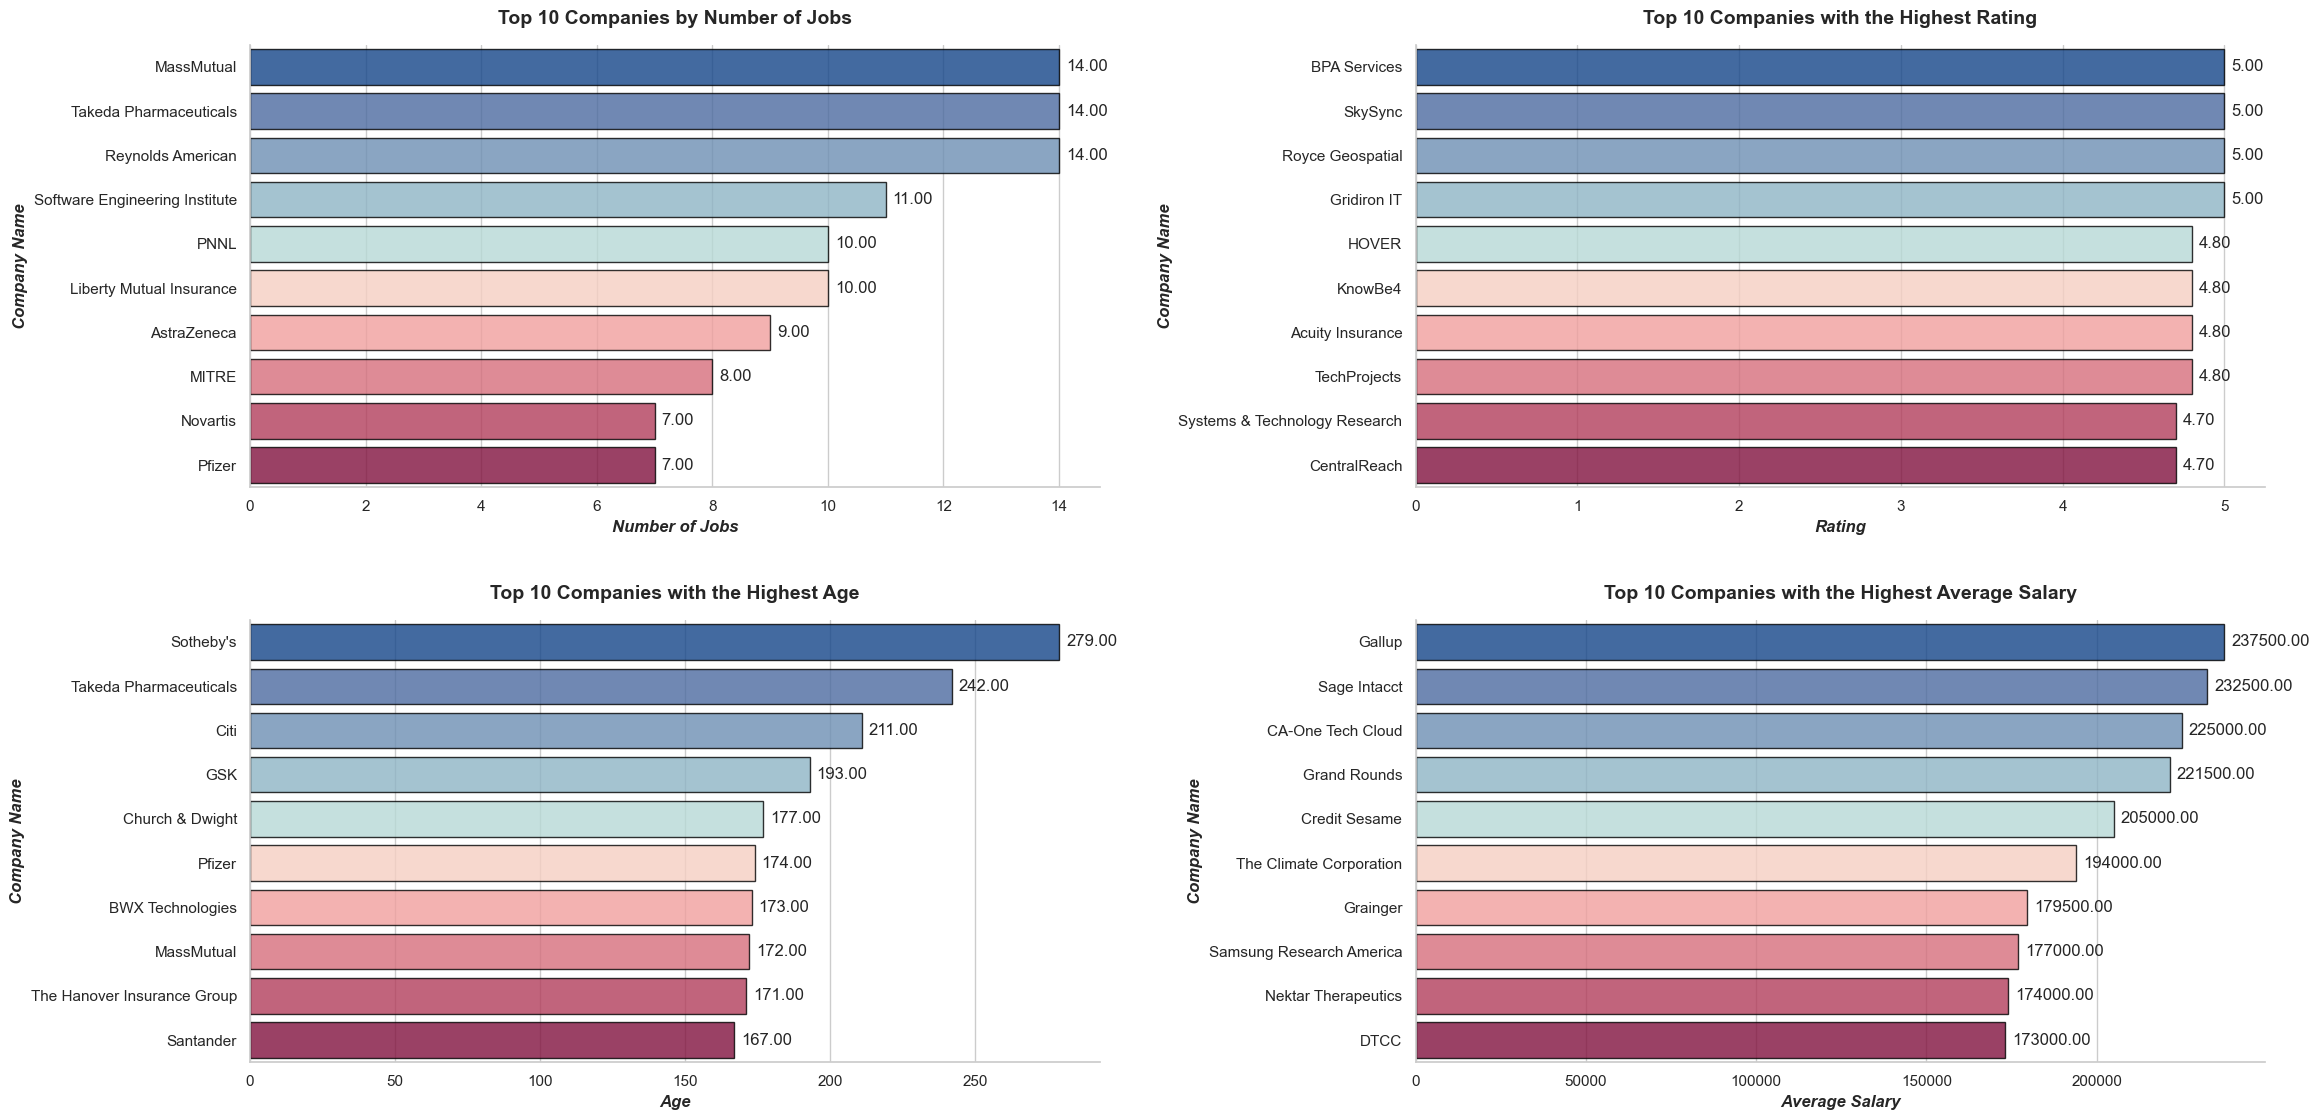

In [ ]:
_, axes = plt.subplots(2, 2, figsize=(24, 12))

for col, ax in zip(['Company Name', 'Rating', 'Age', 'Average Salary'], axes.ravel()):
    if col == 'Company Name':
        top_companies = df['Company Name'].value_counts().head(10)
        sns.barplot(x=top_companies.values, y=top_companies.index, palette=cmap10, ax=ax, alpha=0.8, edgecolor='black')

        ax.set_title("Top 10 Companies by Number of Jobs", fontdict=font_tit, pad=15)
        ax.set_xlabel("Number of Jobs", fontdict=font_ax)
        ax.set_ylabel("Company Name", fontdict=font_ax)
    else:
        top_by_category = df[['Company Name', col]].groupby('Company Name').mean().sort_values(col, ascending=False)
        top_n           = top_by_category.head(10)

        sns.barplot(x=top_n[col], y=top_n.index, palette=cmap10, ax=ax, alpha=0.8, edgecolor='black')

        ax.set_title(f"Top 10 Companies with the Highest {col}", fontdict=font_tit, pad=15)
        ax.set_xlabel(col, fontdict=font_ax)
        ax.set_ylabel("Company Name", fontdict=font_ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

1. **Top 10 công ty theo số lượng công việc (Number of Jobs)**
   - **Công ty có nhiều công việc nhất:** **MassMutual**, **Reynolds American**, và **Takeda Pharmaceuticals** đều có 14 công việc.
     
   - **Các công ty có số lượng công việc cao tiếp theo:**
     - **Software Engineering Institute**: 11 công việc.
     - **PNNL** và **Liberty Mutual Insurance**: 10 công việc.
     - **AstraZeneca**: 9 công việc.
     
   - **Các công ty ít hơn trong nhóm Top 10:**
     - **MITRE**, **Numeric, LLC**, và **Advanced BioScience Laboratories**: 7-8 công việc.

   - **Nhận xét:**
     - Các công ty lớn trong lĩnh vực bảo hiểm, dược phẩm, và công nghệ thường có số lượng công việc cao.
     - **MassMutual** và **Takeda Pharmaceuticals** nổi bật với số lượng công việc nhiều nhất.


2. **Top 10 công ty có đánh giá cao nhất (Highest Rating)**
   - **Công ty có đánh giá cao nhất:** **BPA Services**, **Gridiron IT**, **Royce Geospatial**, **SkySync** đều đạt điểm **5.0**.

   - **Các công ty có đánh giá cao tiếp theo:**
     - **Acuity Insurance**, **KnowBe4**, **TechProjects**, và **HOVER**: 4.8.
     - **Object Partners** và **New England Biolabs**: 4.7.

   - **Nhận xét:**
     - Các công ty đạt đánh giá cao nhất thường hoạt động trong lĩnh vực công nghệ, bảo hiểm, và phân tích dữ liệu.
     - **BPA Services** và **Gridiron IT** dẫn đầu với mức đánh giá hoàn hảo.


3. **Top 10 công ty có tuổi đời lớn nhất (Highest Age)**
   - **Công ty lâu đời nhất:** **Sotheby’s**: 279 năm.
     
   - **Các công ty lâu đời tiếp theo:**
     - **Takeda Pharmaceuticals**: 242 năm.
     - **Citi**: 211 năm.
     - **GSK**: 193 năm.
     - **Church & Dwight**: 177 năm.

   - **Các công ty ít tuổi hơn trong nhóm Top 10:**
     - **MassMutual**, **BWX Technologies**, **The Hanover Insurance Group**, và **Santander**: 167-174 năm.

   - **Nhận xét:**
     - Các công ty trong lĩnh vực tài chính, bảo hiểm, và dược phẩm thường có tuổi đời lâu dài.
     - **Sotheby’s**, một công ty đấu giá, là công ty lâu đời nhất trong danh sách.


4. **Top 10 công ty có mức lương trung bình cao nhất (Highest Average Salary)**
   - **Công ty có mức lương trung bình cao nhất:**
     - **Gallup**: 237,500.
     - **Sage Intacct**: 232,500.
     - **CA-One Tech Cloud**: 225,000.

   - **Các công ty có mức lương cao tiếp theo:**
     - **Grand Rounds**: 221,500.
     - **Credit Sesame**: 205,000.
     - **The Climate Corporation**: 194,000.

   - **Các công ty thấp hơn trong nhóm Top 10:** **Grainger**, **Samsung Research America**, **Nektar Therapeutics**, và **DTCC**: 173,000-179,500.

   - **Nhận xét:**
     - Các công ty công nghệ và nghiên cứu như **Gallup**, **Sage Intacct**, và **CA-One Tech Cloud** dẫn đầu về mức lương trung bình.
     - Mức lương trung bình cao nhất lên tới **237,500**, cho thấy các công ty này tập trung vào các công việc có giá trị cao.


5. **Tổng kết:**
   - **Số lượng công việc:** Công ty bảo hiểm và dược phẩm như **MassMutual** và **Takeda Pharmaceuticals** dẫn đầu.
   - **Đánh giá cao nhất:** Các công ty công nghệ và bảo hiểm như **BPA Services** và **Gridiron IT** đạt điểm tối đa.
   - **Tuổi đời lâu nhất:** **Sotheby’s** là công ty lâu đời nhất với 279 năm.
   - **Mức lương trung bình cao nhất:** Công ty công nghệ như **Gallup** và **Sage Intacct** có mức lương cao nhất, vượt **230,000**.

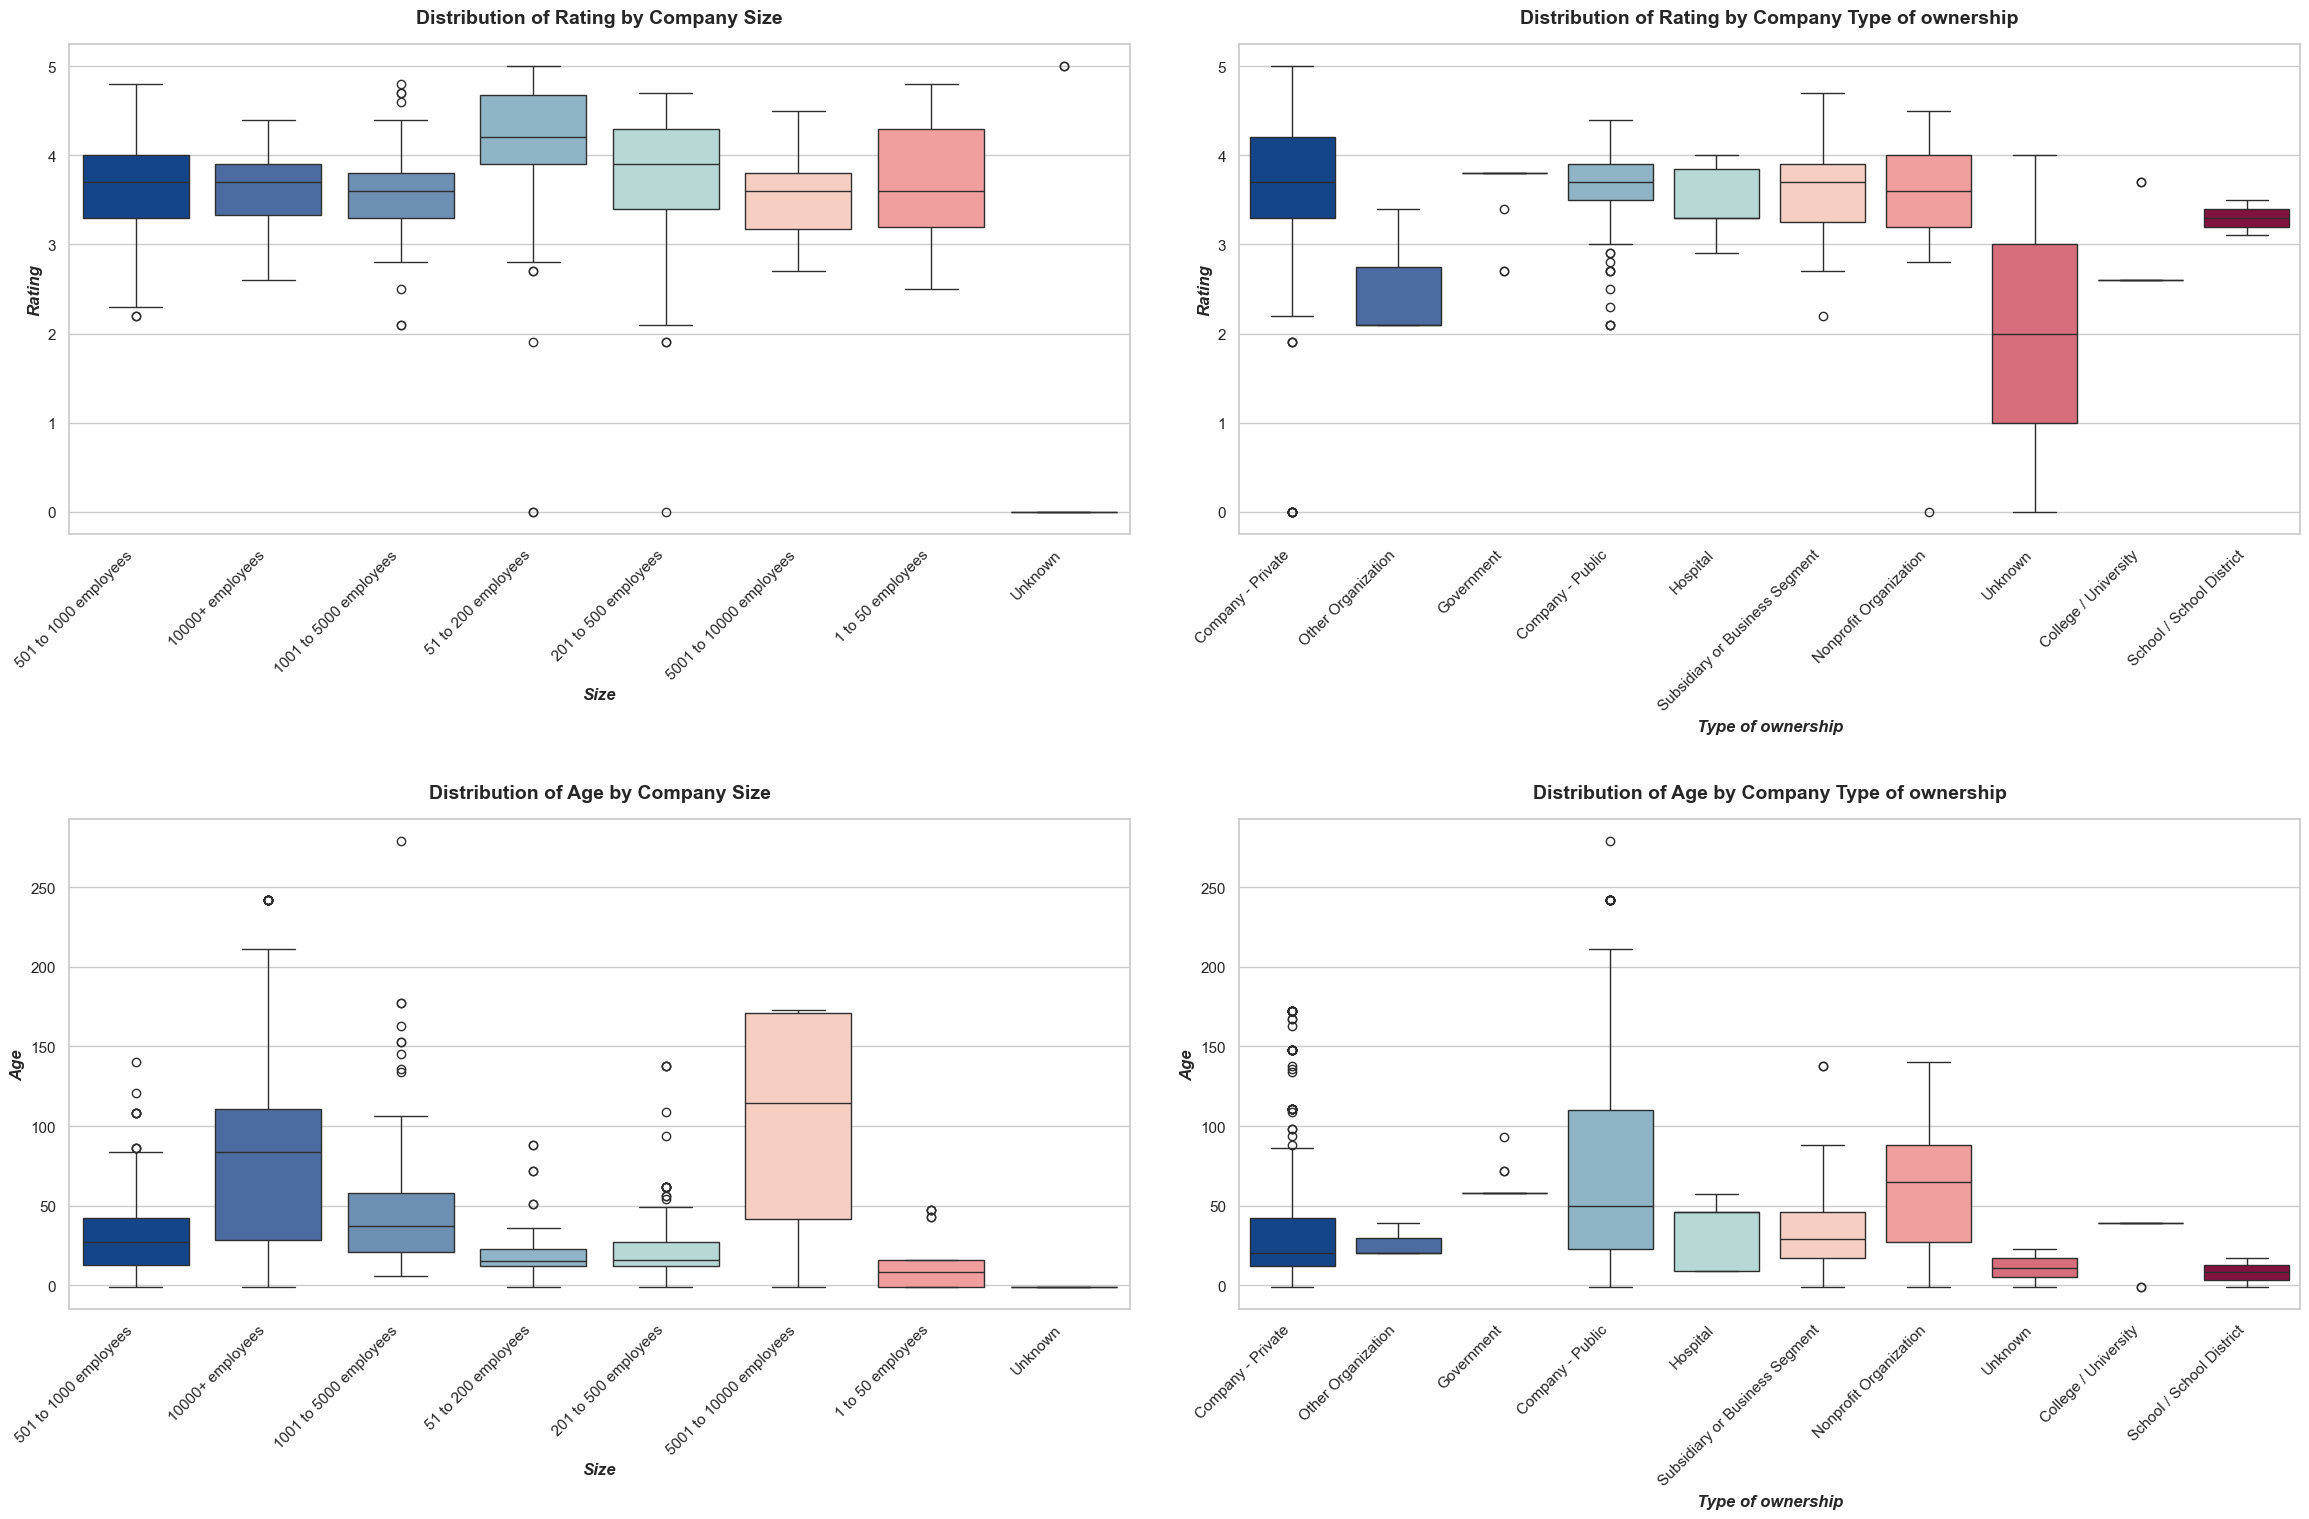

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

ycols = ['Rating', 'Age']
xcols = ['Size', 'Type of ownership']

for i, (ycol, ax_row) in enumerate(zip(ycols, axes)):
    for j, (xcol, ax) in enumerate(zip(xcols, ax_row)):
        sns.boxplot(data=df, x=xcol, y=ycol, ax=ax, palette=cmap10)

        ax.set_title(f'Distribution of {ycol} by Company {xcol}', fontdict=font_tit, pad=15)
        ax.set_xlabel(xcol, fontdict=font_ax)
        ax.set_ylabel(ycol, fontdict=font_ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3)
plt.show()

1. **Phân phối Rating theo Quy mô Công ty (Top-Left)**
   - **Quan sát chính:**
     - Các công ty có quy mô lớn hơn (**1000+ nhân viên**) có phân phối rating khá ổn định và cao (trung vị gần 4).
     - Các công ty nhỏ hơn (**1-50 nhân viên**) có phân phối rộng hơn, rating biến động nhiều, trung vị thấp hơn.
     - Các công ty **51-500 nhân viên** có sự tập trung rating cao nhất, với trung vị gần như chạm mức 4.5.
     - Các công ty có quy mô không xác định (**Unknown**) có rating cực kỳ thấp, gần như bằng 0.

   - **Kết luận:** Công ty có quy mô lớn thường nhận được đánh giá ổn định và cao hơn. Các công ty nhỏ hoặc không xác định có độ biến động lớn.


2. **Phân phối Rating theo Loại hình Sở hữu Công ty (Top-Right)**
   - **Quan sát chính:**
     - **Company - Private** có rating cao nhất và ổn định với trung vị gần 4.  
     - **Other Organization** và **Government** có trung vị rating thấp hơn (dưới 3), đồng thời có nhiều giá trị ngoại lệ thấp.
     - **Company - Public**, **Hospital**, và **Subsidiary or Business Segment** có trung vị rating ổn định và khá cao (~4).
     - **Unknown** và **College/University** có rating trung bình rất thấp, với nhiều giá trị cực tiểu gần 0.

   - **Kết luận:** Công ty tư nhân (**Private**) và các loại hình kinh doanh khác có xu hướng nhận được đánh giá cao hơn so với tổ chức chính phủ hoặc tổ chức không xác định.


3. **Phân phối Tuổi theo Quy mô Công ty (Bottom-Left)**
   - **Quan sát chính:**
     - Các công ty quy mô nhỏ (**1-50 nhân viên**) có tuổi đời lớn nhất, với trung vị cao (~100 tuổi) và phân phối rộng.
     - Các công ty **5001-10000 nhân viên** có tuổi đời thấp nhất.
     - Công ty **1000+ nhân viên** và **501-1000 nhân viên** có tuổi đời ổn định, trung vị khoảng 25-50 năm.
     - Công ty quy mô **Unknown** có tuổi đời cực thấp (gần 0).

   - **Kết luận:** Công ty nhỏ có thể tồn tại lâu đời hơn, trong khi các công ty lớn và đang phát triển có xu hướng trẻ hơn.


4. **Phân phối Tuổi theo Loại hình Sở hữu Công ty (Bottom-Right)**
   - **Quan sát chính:**
     - **Company - Public** và **Hospital** có tuổi đời cao nhất (trung vị trên 50 năm).
     - **Other Organization** và **Government** có tuổi đời cao, với một số ngoại lệ rất lớn (>200 năm).
     - **Company - Private** và **Subsidiary or Business Segment** có tuổi đời tương đối thấp (trung vị dưới 25 năm).
     - **Unknown**, **College/University**, và **School/School District** có tuổi đời thấp nhất.

   - **Kết luận:** Các công ty công khai và tổ chức chính phủ có tuổi đời lâu hơn đáng kể so với công ty tư nhân hoặc các tổ chức chưa rõ loại hình.


5. **Tổng kết:**

   - **Rating:**  
     - Công ty lớn và công ty tư nhân thường nhận đánh giá cao và ổn định.  
     - Các công ty nhỏ hoặc không rõ quy mô/loại hình có mức đánh giá thấp hơn và biến động lớn.  

   - **Tuổi đời:**  
     - Công ty nhỏ và tổ chức chính phủ có tuổi đời lâu hơn.  
     - Công ty tư nhân và công ty mới nổi có xu hướng trẻ hơn.

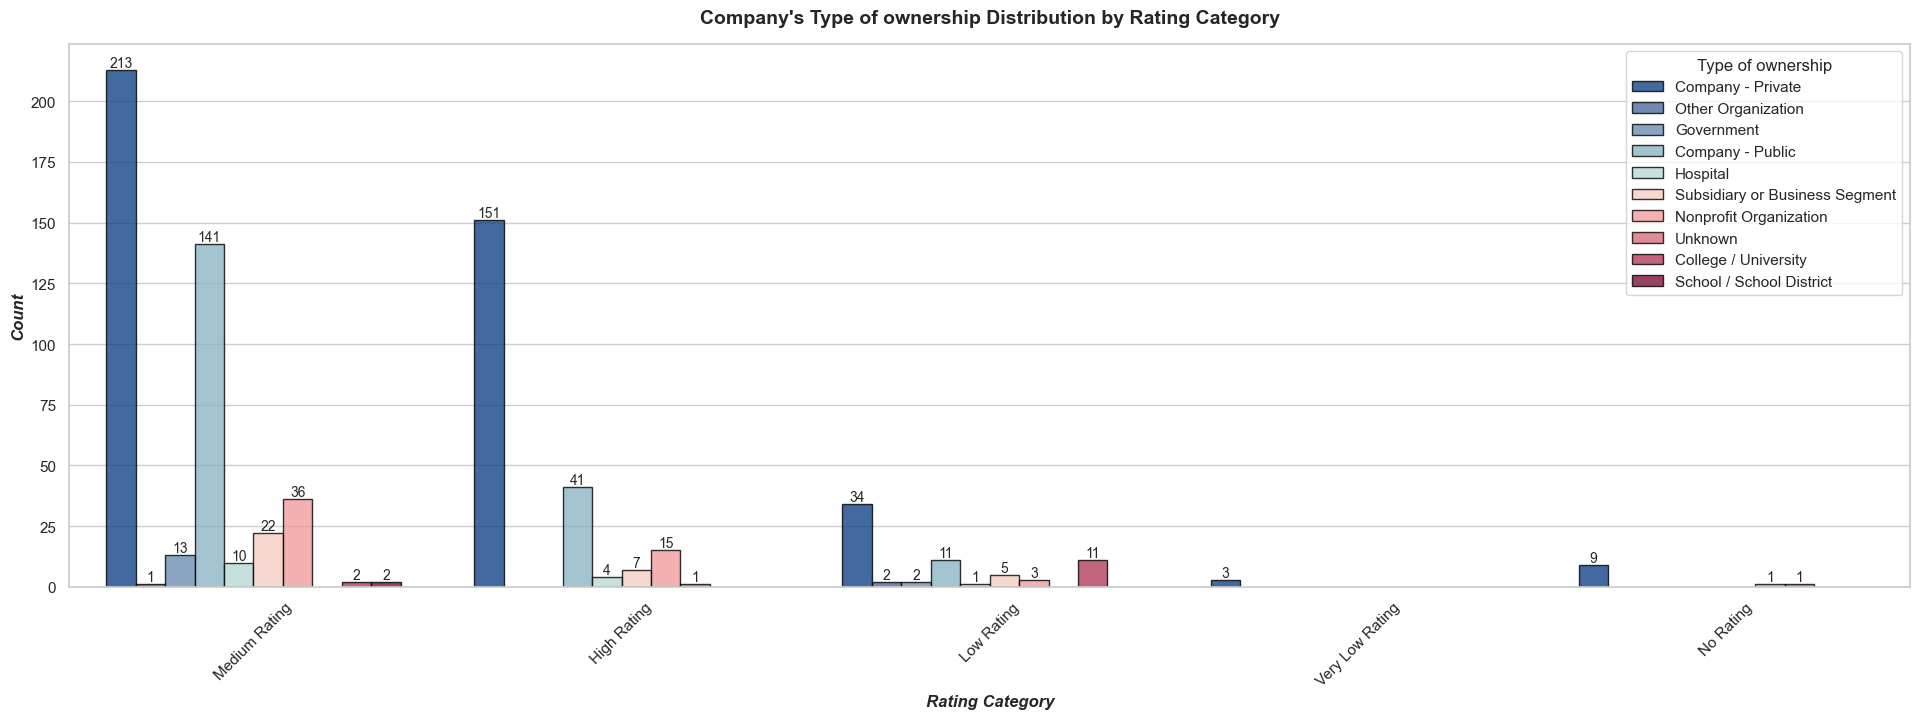

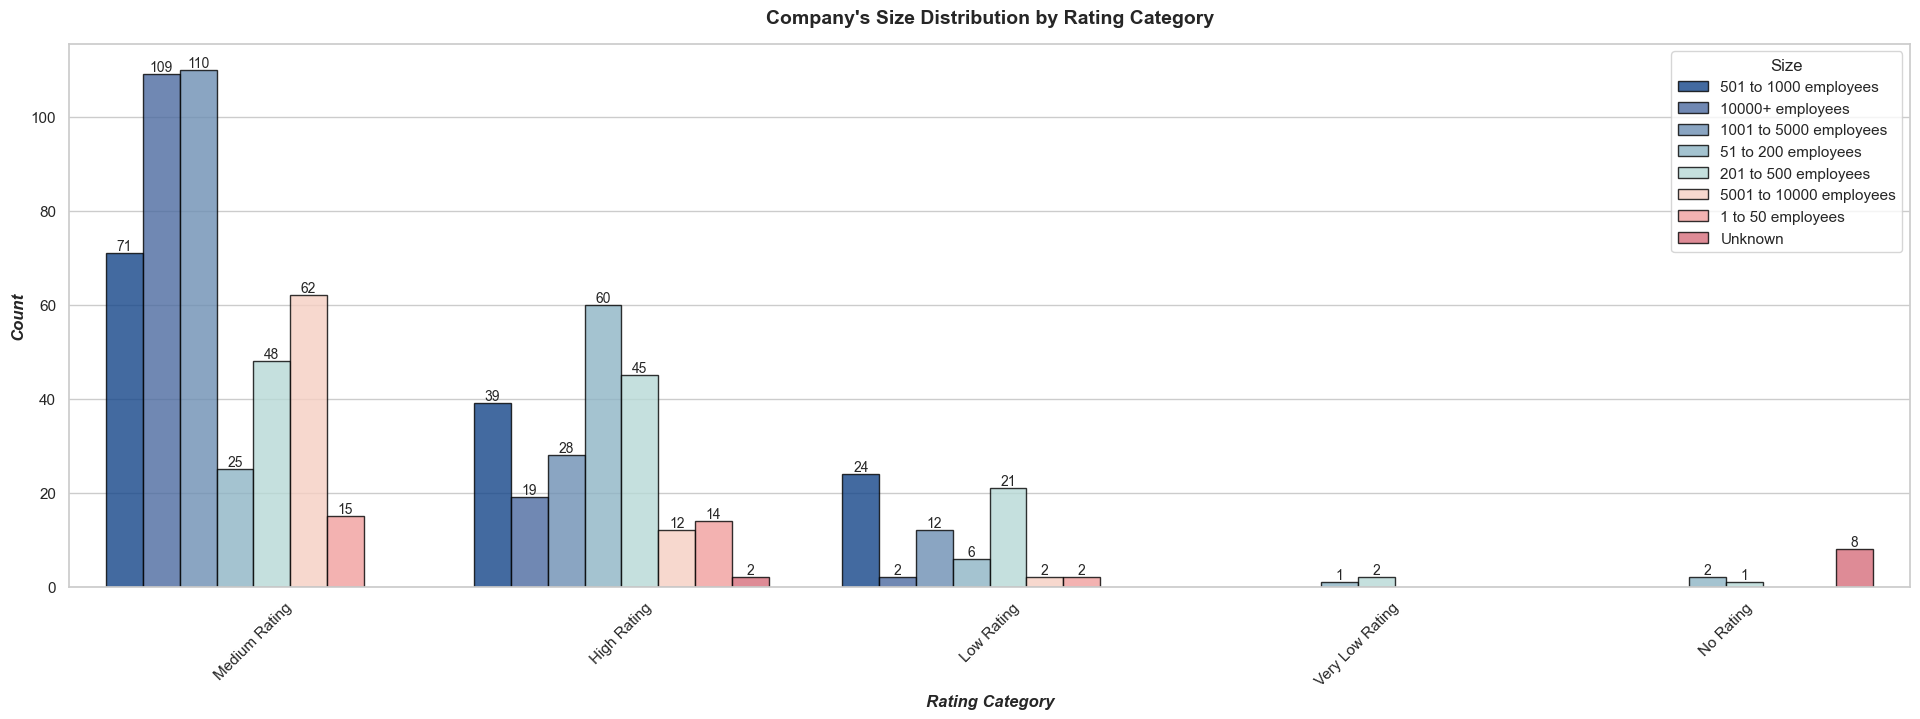

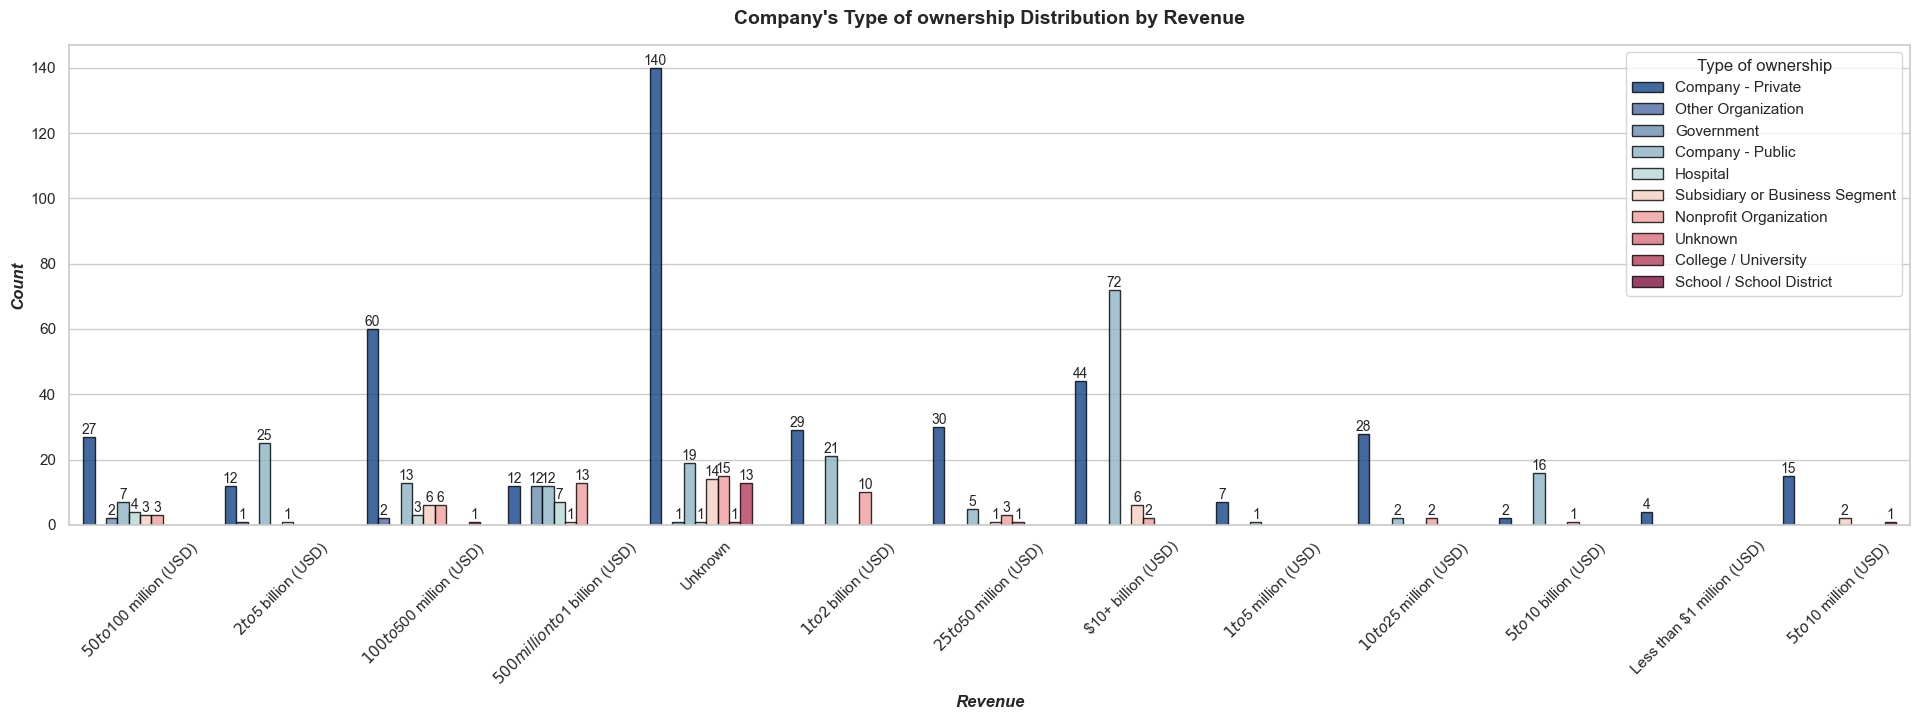

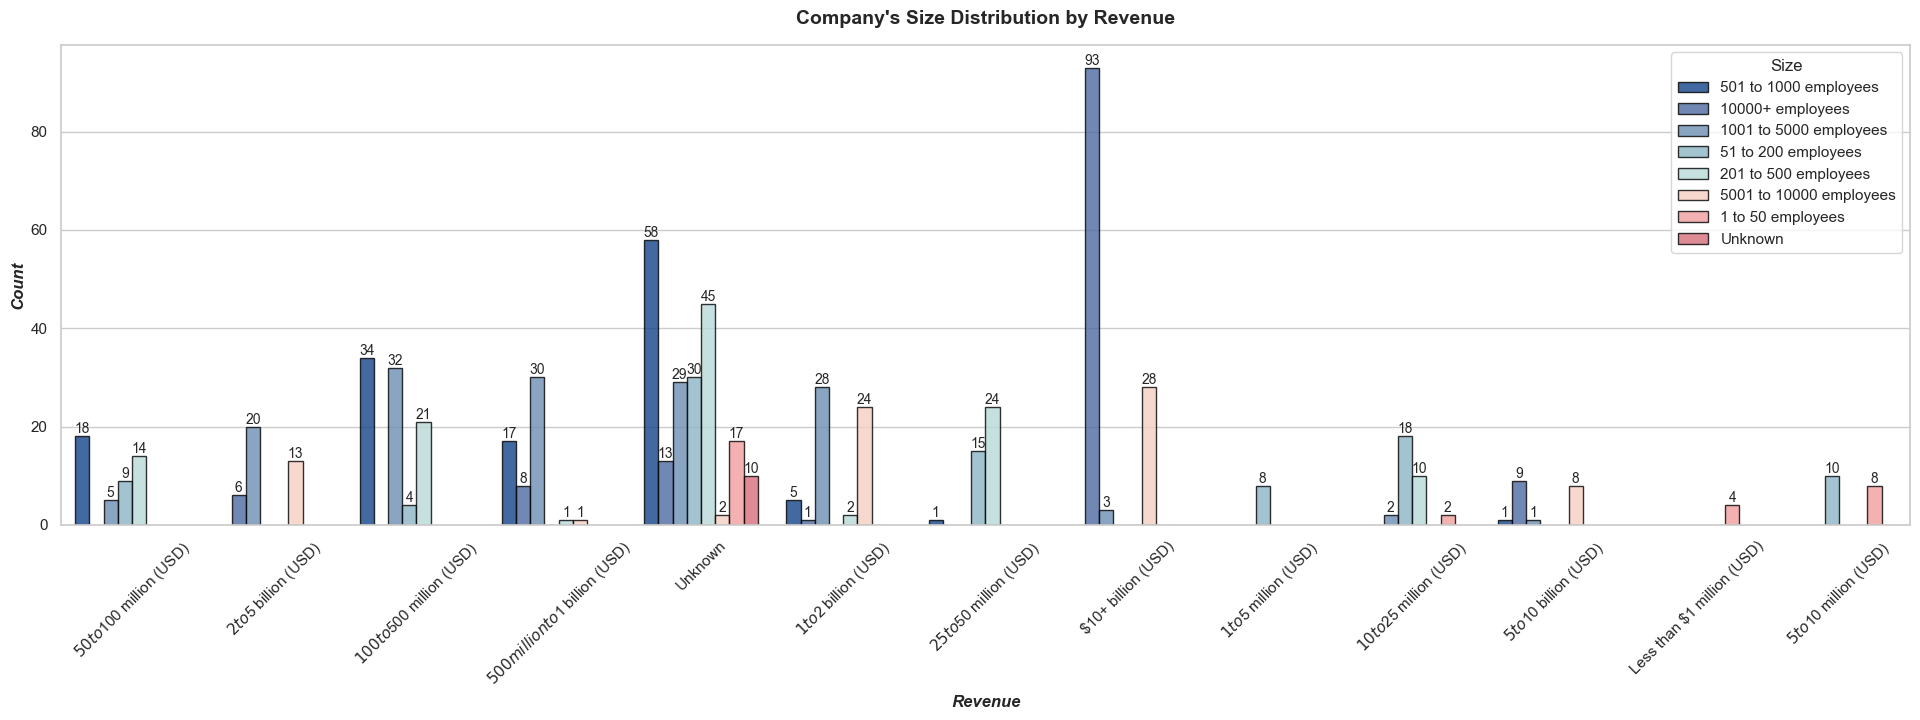

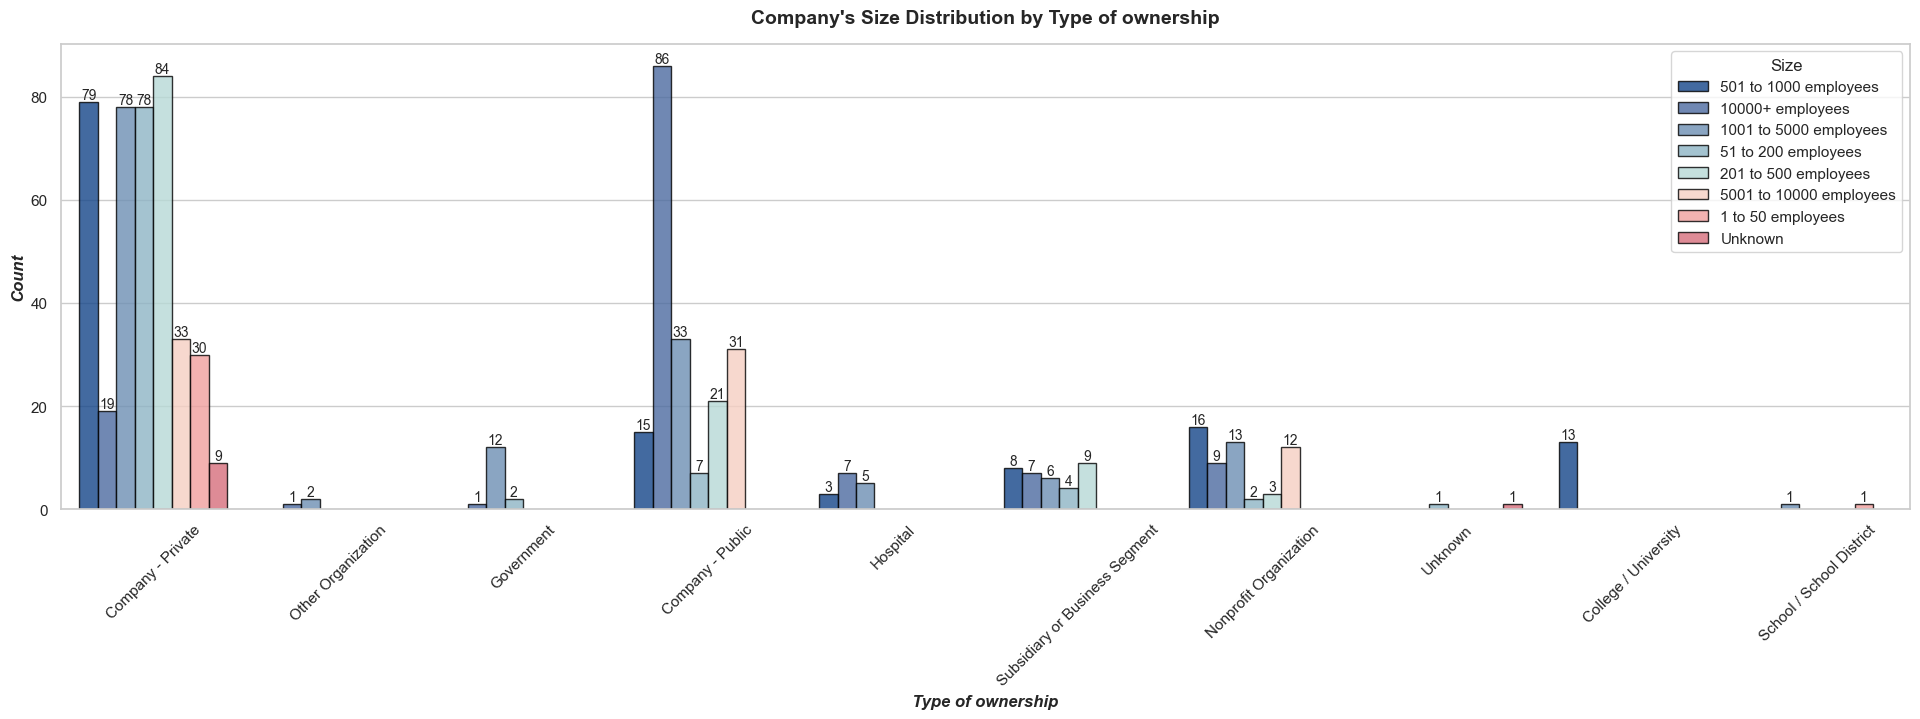

In [ ]:
pairs = list(itertools.product(
    ['Rating Category', 'Revenue', 'Type of ownership'],
    ['Type of ownership', 'Size']
))

for pair in pairs:
    if pair[0] != pair[1]:
        plt.figure(figsize=(20, 8))
        sns.countplot(x=pair[0], hue=pair[1], data=df, palette=cmap10, alpha=0.8, edgecolor='black')

        plt.title(f"Company's {pair[1]} Distribution by {pair[0]}", fontdict=font_tit, pad=15)
        plt.xlabel(pair[0], fontdict=font_ax)
        plt.ylabel("Count", fontdict=font_ax)
        plt.xticks(rotation=45)

        for container in plt.gca().containers:
            plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

        plt.tight_layout(pad=3)
        plt.show()

1. **Phân phối loại hình sở hữu công ty theo nhóm xếp hạng (Company's Type of Ownership Distribution by Rating Category):**
   - **Công ty tư nhân (Private)** chiếm ưu thế ở cả nhóm xếp hạng trung bình (**Medium Rating**) và cao (**High Rating**), với số lượng lần lượt là **213** và **151** công ty.
   - **Công ty công lập (Public)** đứng thứ hai, đặc biệt trong nhóm **Medium Rating** (141 công ty) và **High Rating** (41 công ty).
   - **Tổ chức phi lợi nhuận** và **trường đại học** tập trung chủ yếu ở nhóm **Medium Rating**, ít xuất hiện ở nhóm xếp hạng cao.
   - **Kết luận:** Công ty tư nhân và công lập có sự hiện diện mạnh mẽ trong các nhóm xếp hạng cao, trong khi các loại hình nhỏ hơn thường tập trung ở nhóm trung bình.


2. **Phân phối quy mô công ty theo nhóm xếp hạng (Company's Size Distribution by Rating Category):**
   - **Công ty rất lớn (10,000+ employees)** và **công ty lớn (501 to 1000 employees)** chiếm ưu thế trong các nhóm **Medium Rating** và **High Rating**, với hơn **110 công ty** trong nhóm Medium.
   - **Công ty nhỏ (1 to 50 employees)** có mặt hạn chế, chủ yếu trong nhóm Medium và High Rating.
   - **Kết luận:** Quy mô công ty lớn thường liên quan đến xếp hạng cao hơn, trong khi các công ty nhỏ ít được đánh giá cao.


3. **Phân phối loại hình sở hữu công ty theo doanh thu (Company's Type of Ownership Distribution by Revenue):**
   - **Công ty tư nhân (Private)** chiếm ưu thế ở mọi nhóm doanh thu.
   - **Công ty công lập (Public)** tập trung ở nhóm doanh thu cao, nhưng ít phổ biến hơn ở các nhóm doanh thu thấp.
   - **Tổ chức phi lợi nhuận** và **trường đại học** chủ yếu xuất hiện ở các nhóm doanh thu trung bình và thấp.
   - **Kết luận:** Công ty tư nhân chiếm ưu thế ở mọi mức doanh thu, trong khi công ty công lập tập trung nhiều hơn vào các nhóm doanh thu cao.


4. **Phân phối quy mô công ty theo doanh thu (Company's Size Distribution by Revenue):**
   - **Công ty rất lớn (10,000+ employees)** chiếm ưu thế trong các nhóm doanh thu cao.
   - **Công ty lớn (1001 to 5000 employees)** phân bố đồng đều ở các nhóm doanh thu từ trung bình đến cao.
   - **Công ty nhỏ (1 to 200 employees)** tập trung ở các nhóm doanh thu thấp, với sự hiện diện hạn chế ở các nhóm doanh thu cao.
   - **Kết luận:** Quy mô công ty lớn gắn liền với doanh thu cao, trong khi các công ty nhỏ thường tập trung ở các nhóm doanh thu thấp.


5. **Phân phối quy mô công ty theo loại hình sở hữu (Company's Size Distribution by Type of Ownership):**
   - **Công ty tư nhân (Private)** chiếm ưu thế ở mọi quy mô.
   - **Công ty công lập (Public)** cũng có sự hiện diện mạnh mẽ, đặc biệt ở quy mô rất lớn (**10,000+ employees**, 88 công ty).
   - **Tổ chức phi lợi nhuận** và **trường đại học** tập trung chủ yếu ở quy mô vừa.
   - **Kết luận:** Công ty tư nhân và công lập chiếm ưu thế ở quy mô lớn, trong khi các loại hình nhỏ hơn thường tập trung ở quy mô vừa.


6. **Kết luận:**
   - **Công ty tư nhân và công lập** chiếm ưu thế trong cả xếp hạng cao và doanh thu lớn, đặc biệt là ở quy mô rất lớn.
   - **Các tổ chức phi lợi nhuận và trường đại học** có mặt chủ yếu ở các nhóm xếp hạng trung bình, doanh thu trung bình và quy mô vừa.
   - **Doanh thu và xếp hạng cao** thường liên quan đến quy mô công ty lớn, trong khi các công ty nhỏ và không rõ loại hình sở hữu thường có xếp hạng thấp hơn hoặc không được đánh giá.

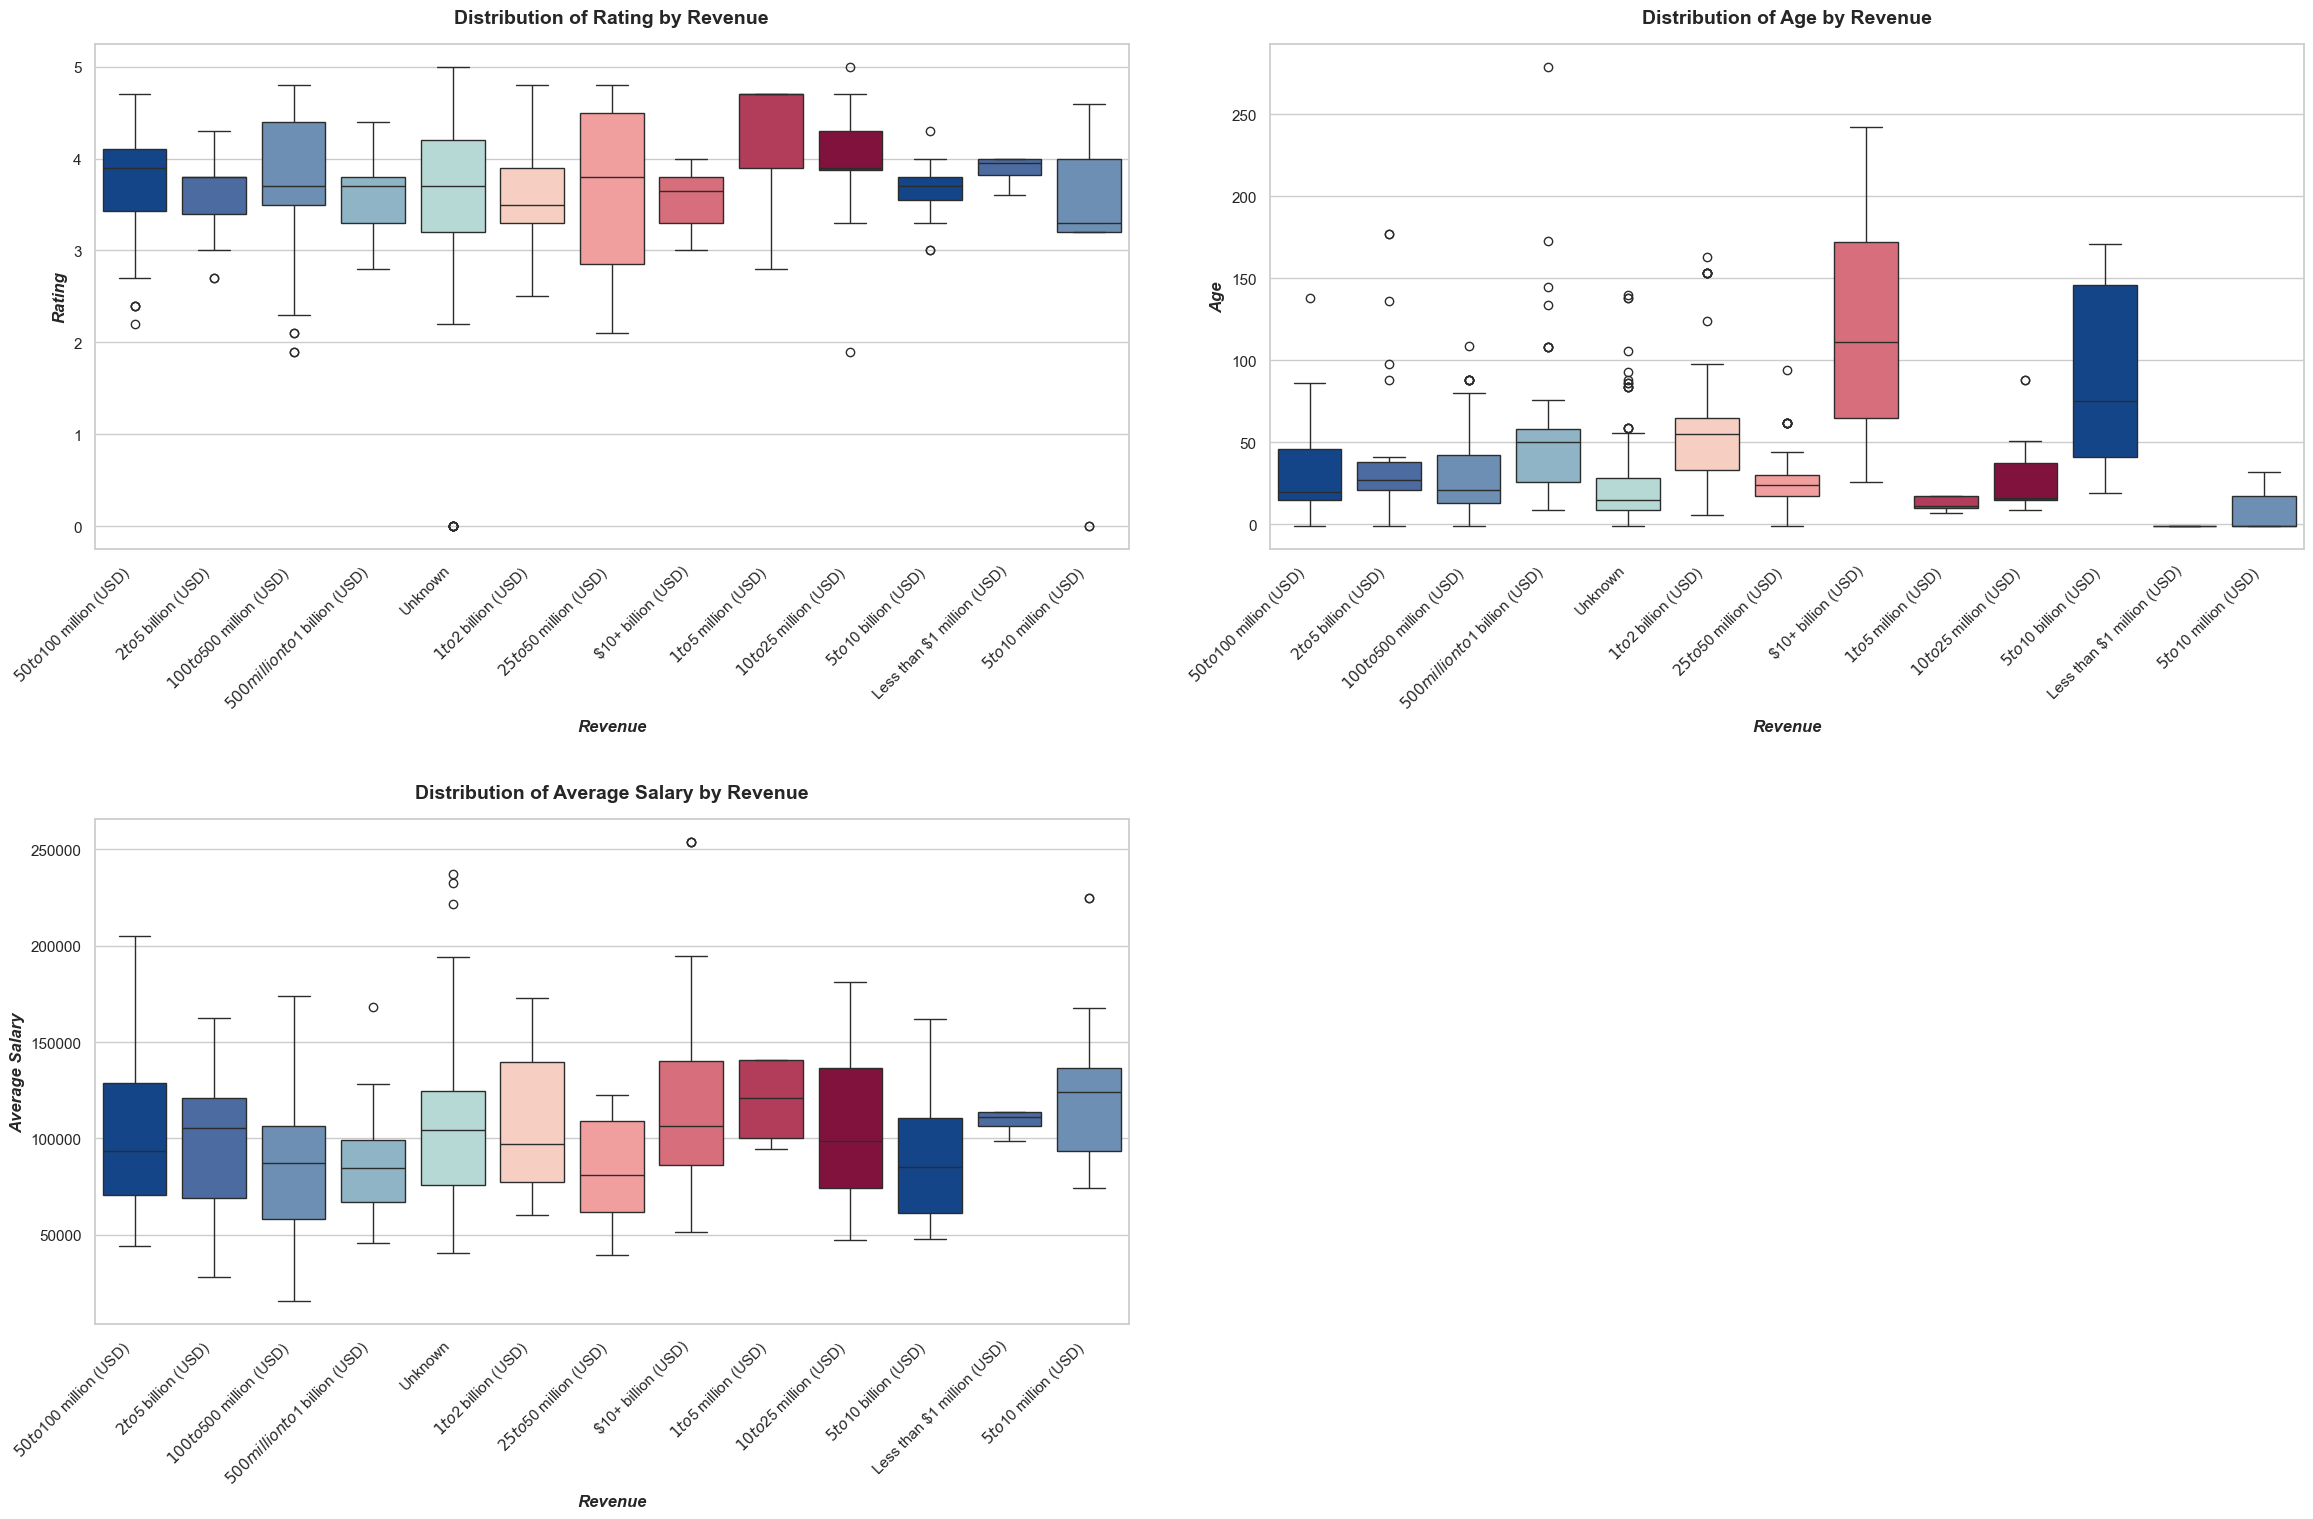

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

for col, ax in zip(['Rating', 'Age', 'Average Salary'], axes.ravel()):
    sns.boxplot(data=df, x='Revenue', y=col, ax=ax, palette=cmap10)

    ax.set_title(f'Distribution of {col} by Revenue', fontdict=font_tit, pad=15)
    ax.set_xlabel("Revenue", fontdict=font_ax)
    ax.set_ylabel(col, fontdict=font_ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in axes.ravel()[len(['Rating', 'Age', 'Average Salary']):]:
    ax.axis('off')

plt.tight_layout(pad=3)
plt.show()

1. **Rating:**  
   - Doanh thu càng lớn, rating trung bình của công ty càng cao và ổn định.  
   - Công ty nhỏ hoặc không xác định doanh thu có rating kém.

2. **Tuổi đời:**  
   - Công ty có doanh thu lớn thường có lịch sử lâu đời hơn.  
   - Công ty nhỏ thường có tuổi đời trẻ hơn.

3. **Mức lương:**  
   - Công ty có doanh thu lớn trả mức lương trung bình cao và ổn định.  
   - Công ty nhỏ trả lương thấp hơn và có biến động lớn hơn.

### **c. Nhóm Skills** (Python_yn, Spark, AWS_yn, Excel_yn, Tableau_yn, SQL_yn)

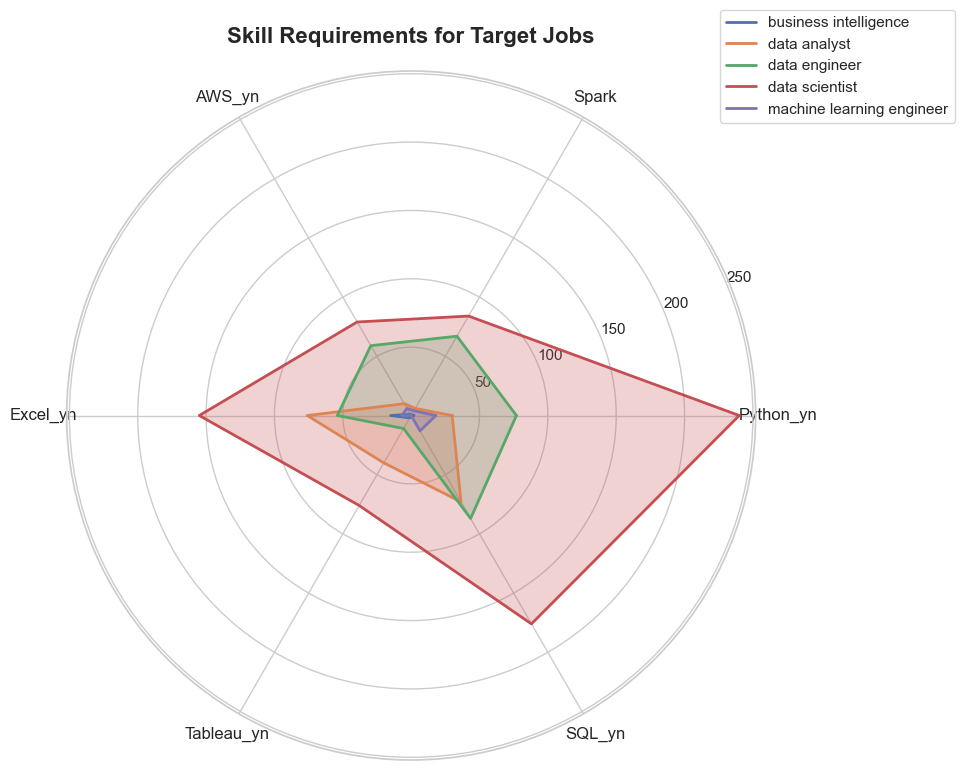

In [ ]:
# NOTE: Một cách trực quan khác sử dụng Radar plot (bổ sung theo đề xuất của GV)

target_jobs     = ['data scientist', 'data analyst', 'data engineer', 'machine learning engineer', 'business intelligence']
required_skills = ['Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Tableau_yn', 'SQL_yn']

# Lọc và xử lý dữ liệu
filtered_df = df[df['job_simplified'].isin(target_jobs)]
skill_counts = (
    filtered_df.groupby('job_simplified')[required_skills].sum()
)

categories = required_skills
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Đóng vòng radar plot

# Radar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for job in skill_counts.index:
    values = skill_counts.loc[job].values.flatten().tolist()
    values += values[:1]  # Đóng vòng radar plot
    ax.plot(angles, values, linewidth=2, label=job)
    ax.fill(angles, values, alpha=0.25)

# ax.set_yticks([1, 2, 3, 4, 5])
# ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

plt.title("Skill Requirements for Target Jobs", size=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

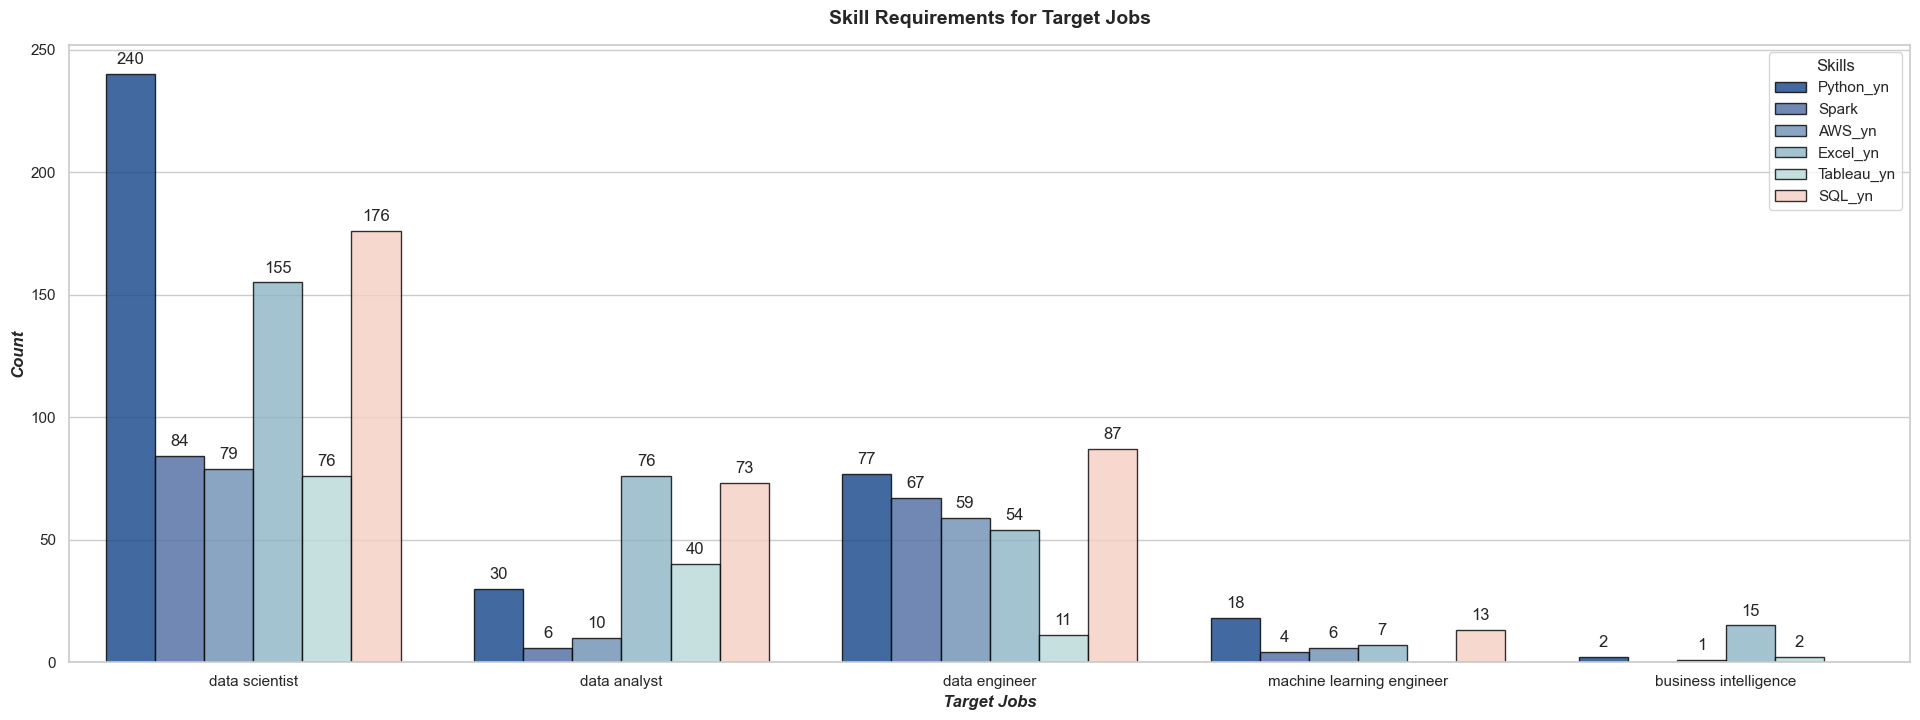

In [ ]:
target_jobs     = ['data scientist', 'data analyst', 'data engineer', 'machine learning engineer', 'business intelligence']
required_skills = ['Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Tableau_yn', 'SQL_yn']

filtered_df = df[df['job_simplified'].isin(target_jobs)]
melted_df   = filtered_df.melt(id_vars='job_simplified', value_vars=required_skills, var_name='Skill', value_name='Required')
melted_df   = melted_df[melted_df['Required'] == 1]

plt.figure(figsize=(20, 8))
fg = sns.countplot(data=melted_df, x='job_simplified', hue='Skill', palette=cmap10, alpha=0.8, edgecolor='black')

plt.title("Skill Requirements for Target Jobs", fontdict=font_tit, pad=15)
plt.xlabel("Target Jobs", fontdict=font_ax)
plt.ylabel("Count", fontdict=font_ax)

for container in fg.containers:
    fg.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.legend(title="Skills")
plt.tight_layout(pad=3)
plt.show()

1. **Công việc: Data Scientist**
    - **Python**, **Excel** và **SQL** là 3 kỹ năng quan trọng nhất cho vị trí Data Scientist.
    - Các kỹ năng khác như **AWS**, **Spark** và **Tableau** cũng được yêu cầu nhưng ít hơn.

2. **Công việc: Data Analyst**
    - **Excel** và **SQL** là hai kỹ năng quan trọng nhất cho vị trí Data Analyst.
    - **Python** và **Tableau** cũng có mức độ yêu cầu đáng kể, nhưng **AWS** và **Spark** ít được yêu cầu hơn.

3. **Công việc: Data Engineer**
    - **SQL** là kỹ năng quan trọng nhất cho Data Engineer, theo sau là **Python**, **Spark**, và **AWS**.
    - **Tableau** ít xuất hiện trong yêu cầu cho vị trí này.

4. **Công việc: Machine Learning Engineer**
    - **Python** là kỹ năng quan trọng nhất cho Machine Learning Engineer.
    - Các kỹ năng khác như **SQL**, **AWS**, và **Spark** cũng được yêu cầu nhưng ít hơn nhiều so với các công việc khác.

5. **Công việc: Business**
    - **Excel** là kỹ năng quan trọng nhất cho Business Intelligence.

6. **Kết luận:** **Python** và **SQL** là hai kỹ năng quan trọng, đặc biệt là cho các công việc như **Data Scientist** và **Data Engineer**.

### **d. Nhóm Location** (job_state, Headquarters, Location, same_state)

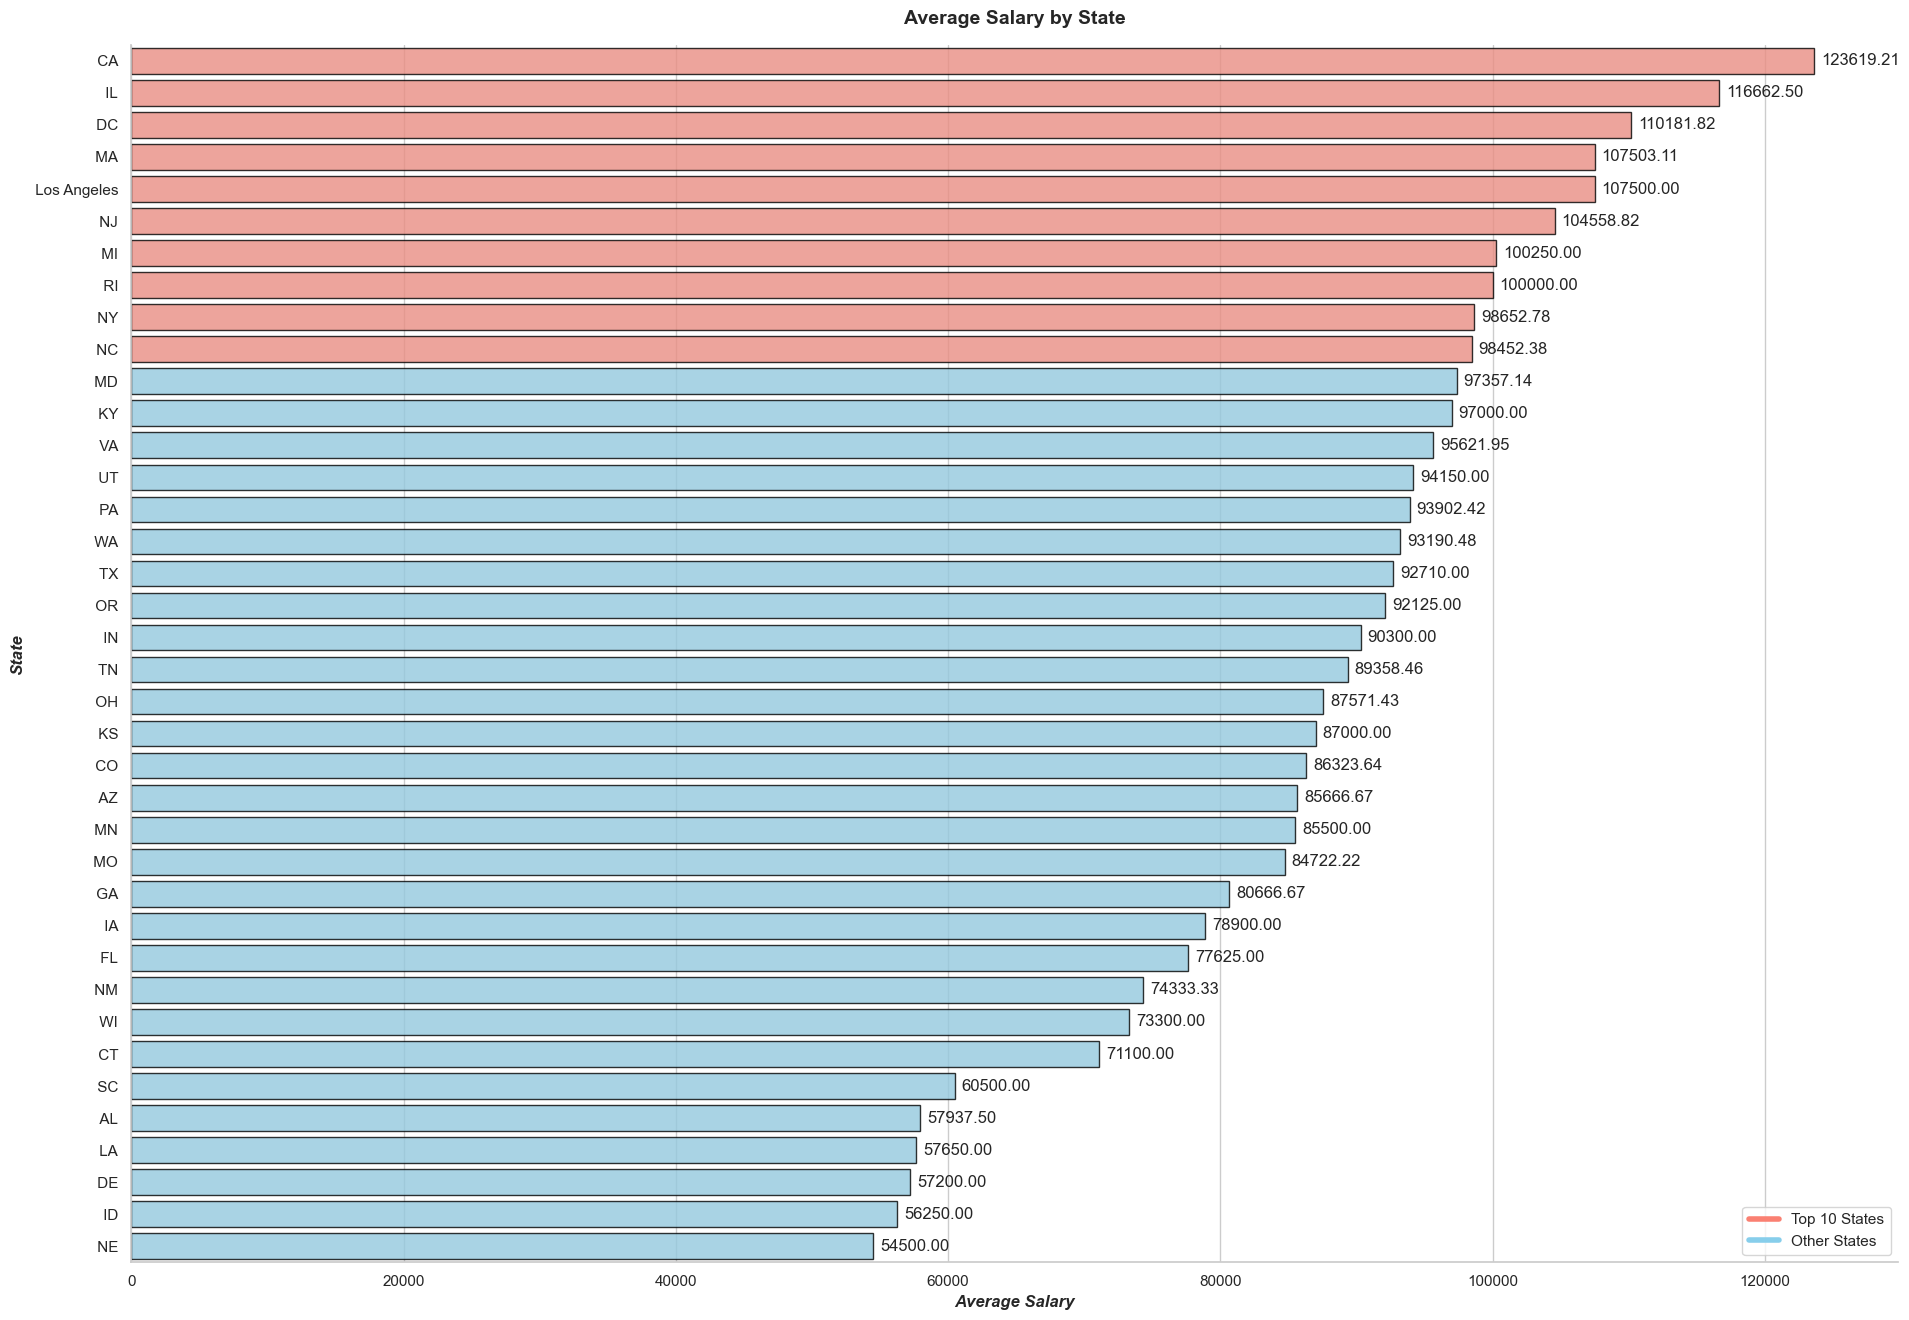

In [ ]:
state_salary  = df.groupby('job_state')['Average Salary'].mean().sort_values(ascending=False)
top_10_states = state_salary.head(10).index

plt.figure(figsize=(20, 14))
colors = ['salmon' if state in top_10_states else 'skyblue' for state in state_salary.index]
fg     = sns.barplot(x=state_salary.values, y=state_salary.index, palette=colors, edgecolor='black', alpha=0.8)

plt.title('Average Salary by State', fontdict=font_tit, pad=15)
plt.xlabel('Average Salary', fontdict=font_ax)
plt.ylabel('State', fontdict=font_ax)

for container in fg.containers:
    fg.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

top_patch   = plt.Line2D([0], [0], color='salmon' , lw=4, label='Top 10 States')
other_patch = plt.Line2D([0], [0], color='skyblue', lw=4, label='Other States')
plt.legend(handles=[top_patch, other_patch], loc='lower right')

sns.despine(top=True, right=True)
plt.tight_layout(pad=3)
plt.show()

**Mức lương trung bình theo bang (Average Salary by State)**

1. **Top 10 Bang có mức lương cao nhất** (màu đỏ):  
   - **California (CA):** Dẫn đầu với **123,619.21 USD**.  
   - Tiếp theo: **Illinois (IL), Washington D.C. (DC), Massachusetts (MA), New Jersey (NJ)**.  
   - Các bang này là trung tâm kinh tế lớn, tập trung ngành công nghệ, tài chính và dịch vụ cao cấp.

2. **Các bang còn lại** (màu xanh):  
   - **Mức lương khá cao:** Maryland (MD), Virginia (VA), Utah (UT).  
   - **Mức lương thấp nhất:**  
     - **Nebraska (NE):** **54,500.00 USD** (thấp nhất cả nước).  
     - Idaho (ID), Delaware (DE) cũng thuộc nhóm lương thấp.

3. **Tổng quan:**  
   - Chênh lệch lớn: CA (cao nhất) gấp **2.2 lần** NE (thấp nhất).  
   - Xu hướng: Bang ven biển và trung tâm kinh tế có lương cao hơn; bang nội địa và miền Nam có lương thấp hơn.  

4. **Kết luận:** California dẫn đầu, Nebraska thấp nhất. Lương cao tập trung ở các bang phát triển mạnh về công nghệ và kinh tế.

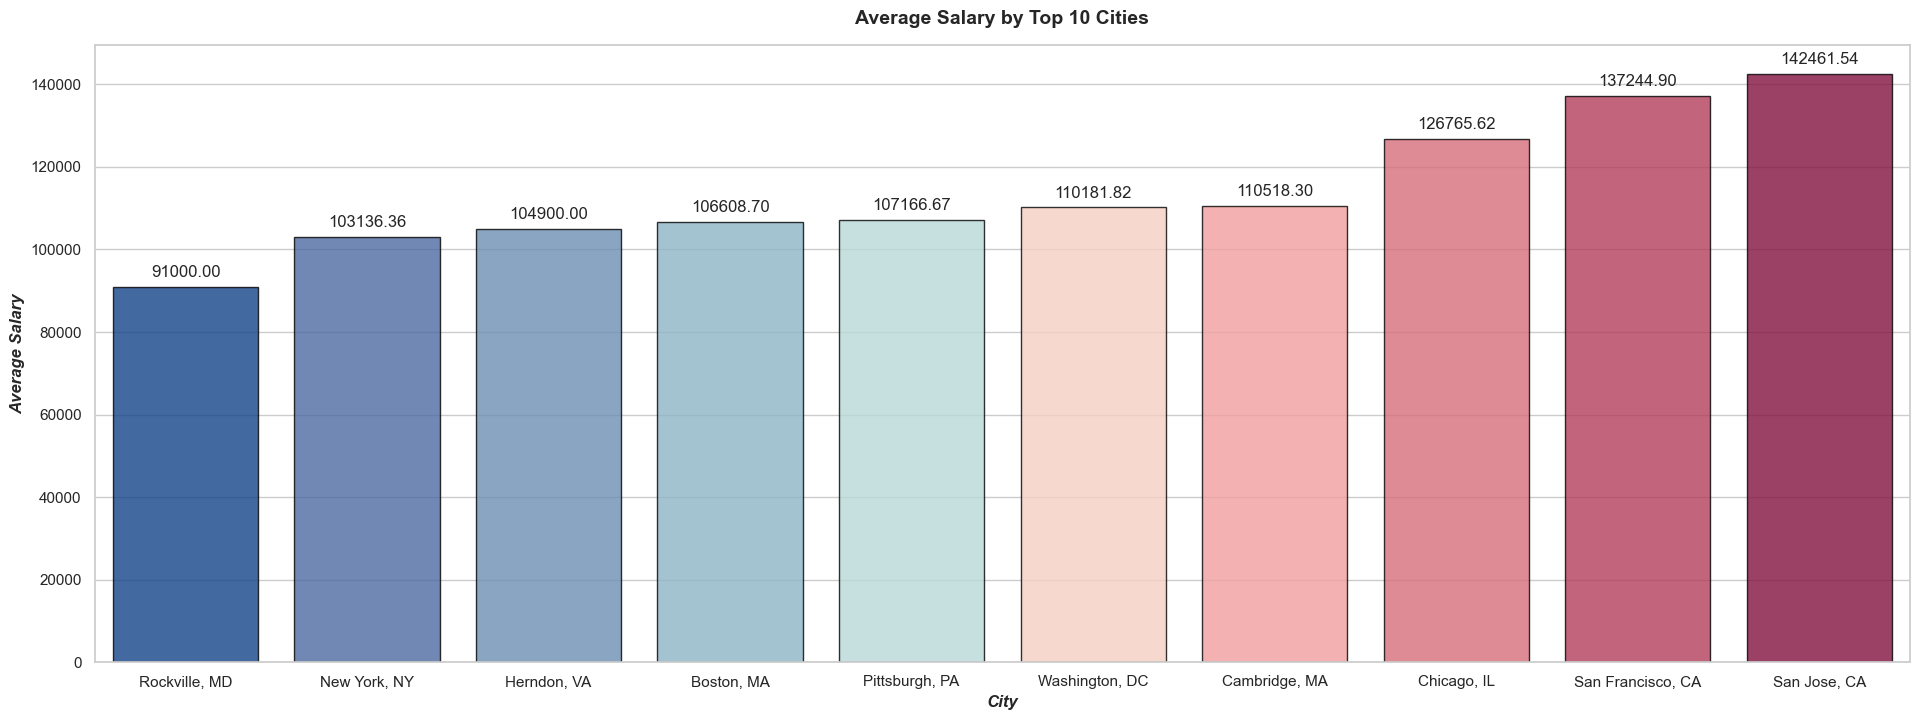

In [ ]:
top_cities  = df['Location'].value_counts().head(10).index
city_salary = df[df['Location'].isin(top_cities)].groupby('Location')['Average Salary'].mean().sort_values()

plt.figure(figsize=(20, 8))
fg = sns.barplot(x=city_salary.index, y=city_salary.values, palette=cmap10, edgecolor='black', alpha=0.8)

plt.title('Average Salary by Top 10 Cities', fontdict=font_tit, pad=15)
plt.xlabel('City', fontdict=font_ax)
plt.ylabel('Average Salary', fontdict=font_ax)

for container in fg.containers:
    fg.bar_label(container, fmt='%.2f', label_type='edge', padding=5)

plt.tight_layout(pad=3)
plt.show()

**Mức lương trung bình theo 10 thành phố hàng đầu**

1. **Thành phố có mức lương cao nhất:**  
   - **San Jose, CA:** **142,461.54 USD** (dẫn đầu).  
   - **San Francisco, CA:** **137,244.90 USD**.  
   → Cả hai thành phố đều là trung tâm công nghệ lớn, tập trung nhiều tập đoàn như Google, Apple, và Meta.  

2. **Thành phố có lương trung bình cao (100,000 - 130,000 USD):**  
   - **Chicago, IL, Cambridge, MA, Washington, DC, Pittsburgh, PA.**  
   → Phát triển mạnh về công nghệ, tài chính, và giáo dục.  

3. **Thành phố có mức lương thấp hơn (dưới 100,000 USD):**  
   - **New York, NY:** **103,136.36 USD**.  
   - **Winston-Salem, NC, Rockville, MD:** Dưới **100,000 USD**.  
   → New York có mức lương thấp hơn kỳ vọng do phân hóa thu nhập và chi phí sống cao.  

4. **Tổng quan:**  
   - **San Jose, CA** có lương trung bình cao nhất, gấp **1.5 lần** so với **Rockville, MD** (thấp nhất: **91,000 USD**).  
   - Thành phố ở California tiếp tục dẫn đầu nhờ nền kinh tế công nghệ phát triển.  

5. **Kết luận:** San Jose và San Francisco là lựa chọn hàng đầu cho thu nhập cao, trong khi các thành phố như Rockville và Winston-Salem có lương thấp hơn nhưng chi phí sinh hoạt có thể hợp lý hơn.

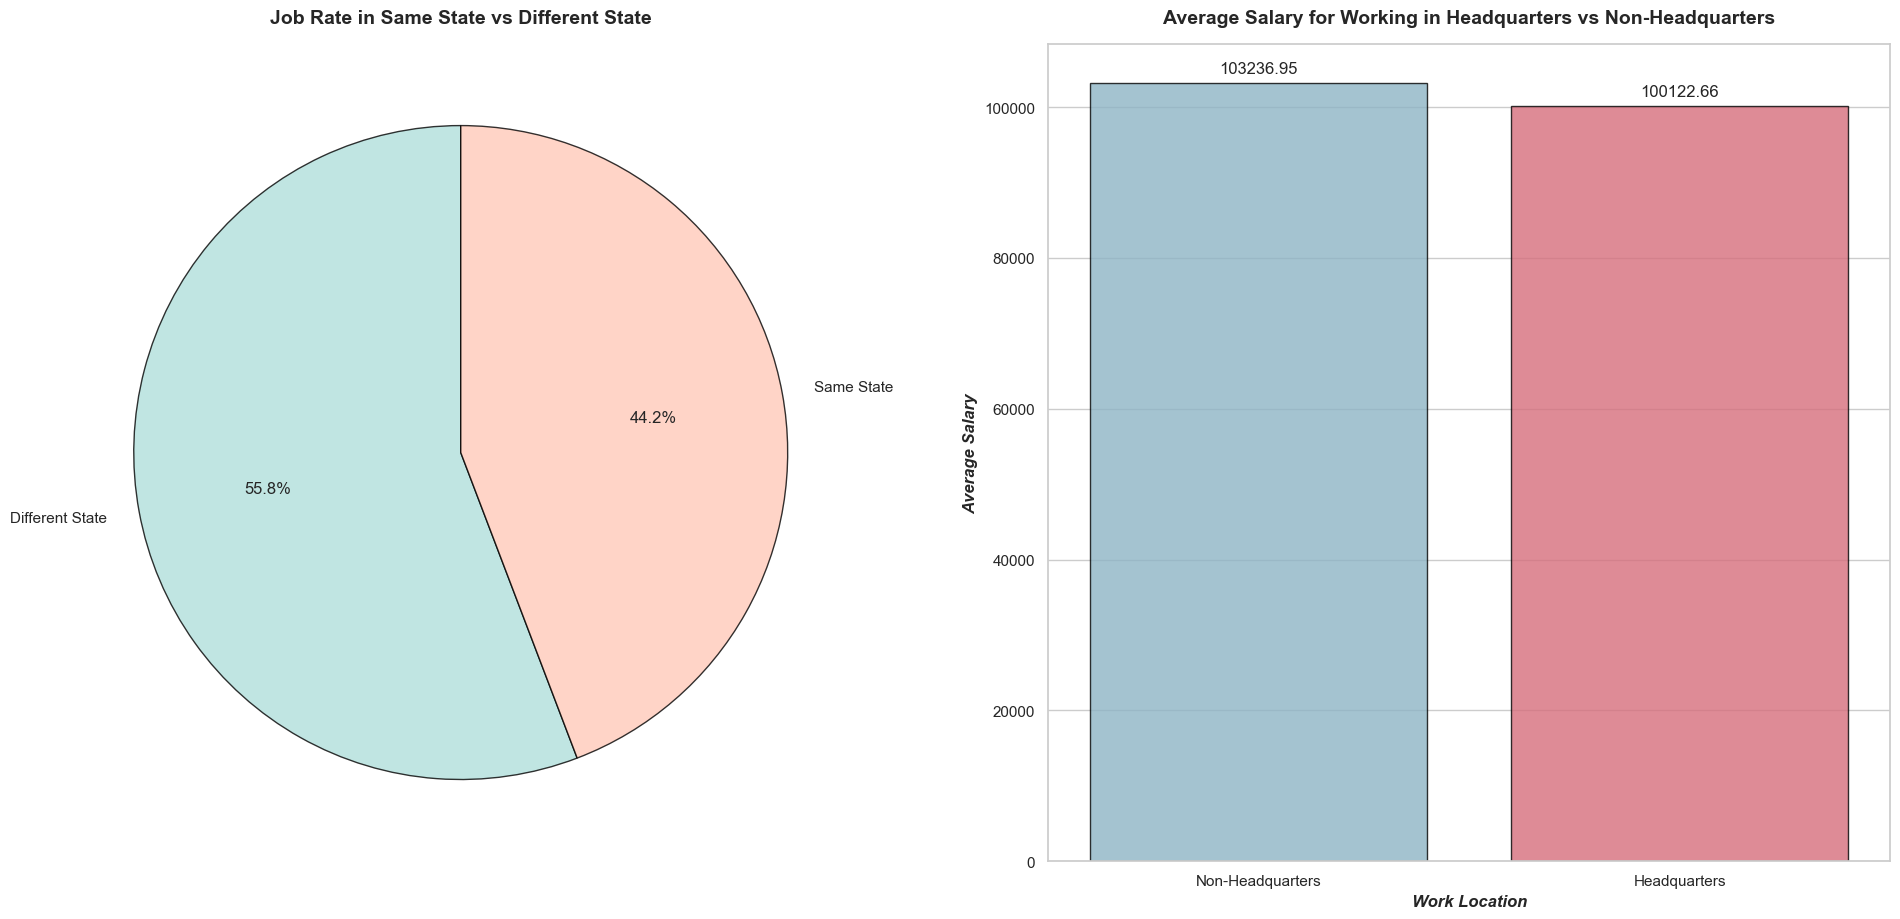

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart: Job in Same State vs Different State
same_state_counts = df['same_state'].value_counts()

wedges, texts, autotexts = axes[0].pie(same_state_counts, labels=['Different State', 'Same State'],
            autopct='%1.1f%%', startangle=90,
            colors=cmap10[4:6], wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title("Job Rate in Same State vs Different State", fontdict=font_tit, pad=15)

for wedge in wedges:
    wedge.set_alpha(0.8)

# Bar chart: Average salary for working in headquarters vs non-headquarters
df['at_headquarters'] = (df['Location'] == df['Headquarters']).astype(int)
salary_comparison = df.groupby('at_headquarters')['Average Salary'].mean()

sns.barplot(x=salary_comparison.index, y=salary_comparison.values, ax=axes[1],
            palette=[cmap10[3], cmap10[-3]], alpha=0.8, edgecolor='black'
)
axes[1].set_title("Average Salary for Working in Headquarters vs Non-Headquarters", fontdict=font_tit, pad=15)
axes[1].set_xlabel("Work Location", fontdict=font_ax)
axes[1].set_ylabel("Average Salary", fontdict=font_ax)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Non-Headquarters", "Headquarters"])

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', label_type='edge', padding=5)

plt.tight_layout(pad=3)
plt.show()

**Tỷ lệ công việc theo bang và mức lương trung bình**

1. **Tỷ lệ công việc (Biểu đồ tròn bên trái):**  
   - **Công việc ở bang khác:** **55.8%** (chiếm ưu thế).  
      → Do xu hướng làm việc từ xa và mở rộng địa lý của công ty.  
   - **Công việc ở cùng bang:** **44.2%**.  
      → Tập trung ở các ngành cần làm việc tại chỗ hoặc gần trụ sở.  

2. **Mức lương trung bình (Biểu đồ cột bên phải):**  
   - **Ngoài trụ sở:** **103,236.95 USD** (cao hơn).  
   - **Tại trụ sở:** **100,122.66 USD**.  
    → Lương ngoài trụ sở cao hơn (~3,114 USD), có thể do:  
     - Chi phí sinh hoạt ở các khu vực khác nhau.  
     - Nhu cầu thu hút nhân tài ở xa.

3. **Kết luận:**  
   - Xu hướng **việc làm linh hoạt** với tỷ lệ cao ở bang khác.  
   - Mức lương ngoài trụ sở nhỉnh hơn, phản ánh sự cạnh tranh và điều chỉnh theo khu vực.  
  → Cho thấy sự thay đổi trong mô hình tổ chức công việc và chính sách lương trong bối cảnh làm việc từ xa ngày càng phổ biến.

# **3. Trích xuất/chọn ra các biến quan trọng cho huấn luyện mô hình**

---

## **a. Biểu đồ tương quan**

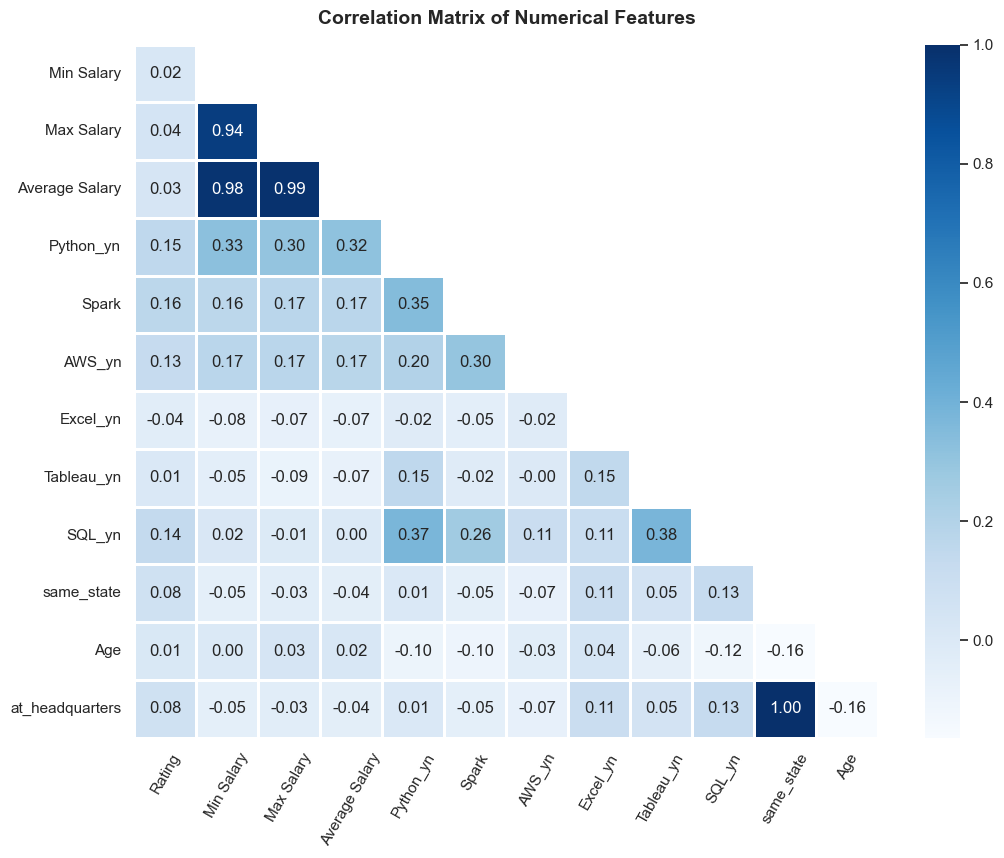

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr().iloc[1:, :-1]
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(12, 9))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues', cbar=True, linewidths=1)
plt.title("Correlation Matrix of Numerical Features", fontdict=font_tit, pad=15)
plt.xticks(rotation=60)

plt.grid(False)
plt.show()

**Phân tích ngắn gọn: Ma trận tương quan của các đặc trưng số**

1. **Mối tương quan chính với lương:** **Min Salary, Max Salary, Average Salary:**   Tương quan rất cao:
     → Hợp lý do lương trung bình phụ thuộc vào lương tối thiểu và tối đa.  

2. **Tương quan giữa kỹ năng và lương:**  
   - **Python_yn:** Tương quan dương nhẹ với **Average Salary (0.32)** → kỹ năng Python cải thiện mức lương.  
   - **Spark:** Tương quan cao nhất với Python (**0.35**) và dương nhẹ với lương (**0.17**).  
   - **AWS_yn:** Tương quan dương nhẹ với lương (**0.17**) và kỹ năng Spark (**0.30**).  
   - **SQL_yn:** Tương quan với Python (**0.37**) và Tableau (**0.38**), tương quan **0.00** với lương.  
   - **Excel_yn, Tableau_yn:** Tương quan không đáng kể với lương → kỹ năng này phổ biến, ít ảnh hưởng đến lương cao.  

3. **Địa điểm làm việc và tuổi công ty:**  
   - **same_state** và **at_headquarters:** Tương quan rất thấp vói lương → địa điểm làm việc không ảnh hưởng đáng kể đến mức lương.  
   - **Age:** Tương quan rất thấp với lương (**0.02**) → lương ít phụ thuộc vào tuổi đời công ty.  

**Kết luận:**  
- **Lương** phụ thuộc chủ yếu vào **Min, Max Salary** và kỹ năng như **Python, Spark, AWS**.  
- **Kỹ năng**: Python là kỹ năng nổi bật, cải thiện lương đáng kể.  
- **Địa điểm làm việc và tuổi công ty**: Không ảnh hưởng nhiều đến mức lương.

## **b. Phân tích ANOVA**

Tìm biến phân loại có khả năng ảnh hưởng đến mức lương.

In [ ]:
import scipy.stats as stats
anova_results = {}
categorical_columns = df.select_dtypes(include='object').columns
# Lặp qua từng biến phân loại
for col in categorical_columns:
    # Nhóm giá trị 'Average Salary' theo các nhóm trong cột
    groups = [df['Average Salary'][df[col] == group] for group in df[col].unique()]

    # Thực hiện kiểm định ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

# Hiển thị kết quả
anova_results = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic','p-value','Significance'])
anova_results['Significance'] = anova_results['p-value'] < 0.05
anova_results.sort_values(by='p-value')

F-statistic       p-value  Significance
Company Name          4.740723  4.549181e-48          True
job_simplified       24.894824  6.405628e-44          True
seniority            43.892767  4.572969e-33          True
Headquarters          3.234980  5.036396e-27          True
Location              2.978916  1.386686e-23          True
job_state             4.248494  9.027568e-15          True
Industry              3.265136  1.173209e-13          True
Type of ownership     7.725791  6.611024e-11          True
Sector                4.283655  7.908559e-11          True
Revenue               5.835820  1.011894e-09          True
Size                  5.868690  1.200392e-06          True
Rating Category       5.663335  1.712989e-04          True

**Nhận xét**:

- Company Name: Có F-statistic là 4.740723 và p-value cực kỳ nhỏ (4.549181e-48), cho thấy biến này có ảnh hưởng đáng kể đến biến phụ thuộc.

- job_simplified: Với F-statistic cao nhất là 24.894824 và p-value rất nhỏ (6.405628e-44), biến này có ảnh hưởng mạnh mẽ nhất đến biến phụ thuộc.

- seniority: F-statistic cao (42.357999) và p-value rất nhỏ (5.346822e-32), xác nhận sự ảnh hưởng đáng kể của biến này.

- Headquarters: F-statistic là 3.234980 và p-value rất nhỏ (5.036396e-27), cho thấy biến này cũng có ảnh hưởng đến biến phụ thuộc.

- Location: F-statistic là 2.978916 và p-value là 1.386686e-23, biến này có ảnh hưởng đáng kể.

- job_state: Với F-statistic là 4.248494 và p-value rất nhỏ (9.027568e-15), biến này có ảnh hưởng rõ rệt.

- Industry: F-statistic là 3.265136 và p-value là 1.173209e-13, biến này có ảnh hưởng.

- Type of ownership: F-statistic là 7.725791 và p-value là 6.611024e-11, biến này có ảnh hưởng mạnh mẽ.

- Sector: F-statistic là 4.283655 và p-value là 7.908559e-11, biến này có ảnh hưởng đáng kể.

- Revenue: F-statistic là 5.835820 và p-value là 1.011894e-09, cho thấy ảnh hưởng rõ rệt.

- Size: F-statistic là 5.868690 và p-value là 1.200392e-06, biến này có ảnh hưởng.

- Rating Category: F-statistic là 5.663335 và p-value là 1.712989e-04, biến này cũng có ảnh hưởng đáng kể.

## **c. Lưu những biến quan trọng**

In [ ]:
data_model = df[['Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_simplified', 'seniority', 'Rating Category', 'job_state','Python_yn', 'Spark', 'AWS_yn','Average Salary']]
data_model.to_csv('data_model.csv', index=False)